<a href="https://colab.research.google.com/github/berkezkul/HousingPricePrediction--Mining_and_Machine-Learning/blob/main/HousingPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor   #çok değişkenli aykırı değer yakalama
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
def load():
    data = pd.read_csv("/content/sample_data/dataset.csv")         #küçük ölçekli okuma
    return data

In [4]:
df = load()

In [5]:
df.head(10)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,room_and_hall_number,gross_and_net_m2,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,in_this_site,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged
0,"""2799900",137998-55,14.05.2024,Satılık,Daire,Daire,2 + 1,125 m2\n/ 105 m2,2. Kat,3 Yaşında,Kombi,4 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250 TL,Evet,"Güney, Doğu",20.000 TL,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""1624000",132292-719,14.05.2024,Satılık,Daire,Daire,2 + 1,98 m2\n/ 91 m2,4. Kat,10 Yaşında,Kombi,20 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,Evet (Site Adı Belirtilmemiş),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""10000000",4369-39466,2.05.2024,Satılık,Daire,NaN,3 + 1,175 m2\n/ 160 m2,1. Kat,11 Yaşında,Kombi,8 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,NaN,NaN,NaN,Beş Yıldız Serena Evleri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""11000000",4369-39353,2.05.2024,Satılık,Daire,NaN,3 + 1,168 m2\n/ 152 m2,1. Kat,16 Yaşında,Kombi,9 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,3.35 TL,Hayır,"Güney, Batı",NaN,NaN,NaN,NaN,Ağaoğlu My Town Sitesi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""3885000",135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,4 + 2,280 m2\n/ 250 m2,Ara Kat,Sıfır Bina,Kombi,5 Katlı,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"""2460000",135879-14,14.05.2024,Satılık,Daire,NaN,2 + 1,140 m2\n/ 120 m2,2. Kat,Sıfır Bina,Kombi,4 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"""1699000",132267-324,14.05.2024,Satılık,Daire,Daire,2 + 1,120 m2\n/ 108 m2,2. Kat,Sıfır Bina,Kombi,4 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,Güney,NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"""110000",98015-1975,14.05.2024,Kiralık,Residence,Daire,3 + 1,250 m2\n/ 200 m2,17. Kat,15 Yaşında,Merkezi (Pay Ölçer),50 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"""150000",98015-1979,14.05.2024,Kiralık,Residence,Daire,4 + 1,302 m2\n/ 225 m2,20. Kat,20 Yaşında,Merkezi (Pay Ölçer),27 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,NaN,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"""140000",98015-2005,14.05.2024,Kiralık,Residence,Daire,3 + 1,286 m2\n/ 180 m2,5. Kat,15 Yaşında,Kombi,35 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,Selenium Twins Residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['price'] = df['price'].str.replace('"', '').astype(int)

In [7]:
df['dues'] = df['dues'].str.replace(' TL', '').str.replace('.', '').astype(float)

In [8]:
df['deposit'] = df['deposit'].str.replace(' TL', '').str.replace('.', '').astype(float)

In [9]:
df['rental_income'] = df['rental_income'].str.replace(' TL', '').str.replace('.', '').astype(float)

In [10]:
df['floor_number'] = df['floor_number'].str.replace(' Katlı', '').str.replace('.', '').astype(float)

In [11]:
df['gross_m2'] = df['gross_and_net_m2'].str.extract(r'(\d+)\s*m2').astype(float)
df['net_m2'] = df['gross_and_net_m2'].str.extract(r'/\s*(\d+)\s*m2').astype(float)

In [12]:
df[['room_num', 'hall_num']] = df['room_and_hall_number'].str.split('+', expand=True)

In [13]:
df['room_num'] = df['room_num'].astype(float)
df['hall_num'] = df['hall_num'].astype(float)

In [14]:
# room_and_hall_number sütununu kaldırma
df.drop(columns=['room_and_hall_number'], inplace=True)

In [15]:
# gross_and_net_m2 sütununu kaldırma
df.drop(columns=['gross_and_net_m2'], inplace=True)

In [16]:
#3 Yaşında yerine veya Sıfır Bina yerine integer olarak ele aldık.
df['building_age'] = df['building_age'].str.replace(' Yaşında', '')
df['building_age'] = df['building_age'].replace('Sıfır Bina', '0')

In [17]:
#2.Kat vs yerine integer kısmı aldık.
df['which_that_floor'] = df['which_that_floor'].str.replace('. Kat', '')

In [18]:
df['which_that_floor'] = df.apply(lambda row: int(float(row['floor_number']) / 2) if row['which_that_floor'] == 'Ara Kat' else row['which_that_floor'], axis=1)

In [19]:
# Site içerisinde olup olmadığını belirleyen yeni bir sütun oluşturma
df['in_site'] = df['in_this_site'].notna().astype(int)

In [20]:
# Site isimlerini yeni bir sütuna yazma
df['site_name'] = df['in_this_site'].where(df['in_this_site'].notna(), 'No Site')

In [21]:
# Orijinal in_this_site sütununu kaldırma
df.drop(columns=['in_this_site'], inplace=True)

In [22]:
df.head(10)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged,room_num,hall_num,in_site,site_name
0,2799900,137998-55,14.05.2024,Satılık,Daire,Daire,2,3,Kombi,4.000,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250.000,Evet,"Güney, Doğu",20000.000,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000,105.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
1,1624000,132292-719,14.05.2024,Satılık,Daire,Daire,4,10,Kombi,20.000,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.000,91.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
2,10000000,4369-39466,2.05.2024,Satılık,Daire,NaN,1,11,Kombi,8.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.000,160.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Beş Yıldız Serena Evleri
3,11000000,4369-39353,2.05.2024,Satılık,Daire,NaN,1,16,Kombi,9.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,335.000,Hayır,"Güney, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.000,152.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Ağaoğlu My Town Sitesi
4,3885000,135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.000,250.000,NaN,NaN,NaN,NaN,NaN,4.000,2.000,0,No Site
5,2460000,135879-14,14.05.2024,Satılık,Daire,NaN,2,0,Kombi,4.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.000,120.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
6,1699000,132267-324,14.05.2024,Satılık,Daire,Daire,2,0,Kombi,4.000,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,Güney,NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.000,108.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
7,110000,98015-1975,14.05.2024,Kiralık,Residence,Daire,17,15,Merkezi (Pay Ölçer),50.000,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.000,200.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,0,No Site
8,150000,98015-1979,14.05.2024,Kiralık,Residence,Daire,20,20,Merkezi (Pay Ölçer),27.000,NaN,Eşyalı Değil,3.000,Betonarme,NaN,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.000,225.000,NaN,NaN,NaN,NaN,NaN,4.000,1.000,0,No Site
9,140000,98015-2005,14.05.2024,Kiralık,Residence,Daire,5,15,Kombi,35.000,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.000,180.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Selenium Twins Residence


**Aykırı Değer İçin Limitleri Belirleme**




In [23]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
outlier_thresholds(df, "price")

(-44215000.0, 73729000.0)

**Aykırı Değerlerin Tespiti**

In [24]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [25]:
check_outlier(df, "price")

True

In [26]:
check_outlier(df, "dues")

True

*Numerik gözüken ama kategorik, kategorik gözüken ama numerik olan değişkenlerin tespiti: *

In [27]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Notes
    ------

        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        (Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.)
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [28]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 4193
Variables: 41
cat_cols: 27
num_cols: 9
cat_but_car: 5
num_but_cat: 6


In [29]:
cat_cols

['advert_state',
 'house_type',
 'housing_shape',
 'heating_type',
 'credit_elegibility',
 'furniture_status',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'swap',
 'facade',
 'fuel_type',
 'authorized_office',
 'period',
 'guests_number',
 'invoices_included_in_the_price',
 'cleaning_fee',
 'video_calling',
 'pets_allowed',
 'entertainment_arranged',
 'room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'hall_num',
 'in_site']

In [30]:
num_cols

['price',
 'floor_number',
 'bath_number',
 'dues',
 'rental_income',
 'deposit',
 'gross_m2',
 'net_m2',
 'room_num']

In [31]:
cat_but_car

['advert_id',
 'last_update_date',
 'which_that_floor',
 'building_age',
 'site_name']

Normalde sayısal anlam içeren fakat çok az ilanda verisi bulunduğu için kategorik gözüken değerleri ele almak için inceledik.

In [32]:
def get_column_info(df, columns_of_interest):
    """
     Her değişken içindeki sınıfların kaçar tane veri barındırdığını görmek için
    """
    column_info = {}
    for col in columns_of_interest:
        nunique = df[col].nunique()
        value_counts = df[col].value_counts()
        column_info[col] = {
            "unique_value_count": nunique,
            "value_counts": value_counts.to_dict()
        }
    return column_info

In [33]:
columns_interest = ['room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'guests_number',
 'hall_num']

In [34]:
get_column_info(df, columns_interest)

{'room_number': {'unique_value_count': 4,
  'value_counts': {1.0: 40, 2.0: 13, 7.0: 1, 4.0: 1}},
 'double_beds_number': {'unique_value_count': 3,
  'value_counts': {1.0: 52, 3.0: 1, 2.0: 1}},
 'single_bed_number': {'unique_value_count': 4,
  'value_counts': {2.0: 20, 1.0: 7, 3.0: 1, 4.0: 1}},
 'halls_number': {'unique_value_count': 3,
  'value_counts': {1.0: 50, 2.0: 2, 4.0: 1}},
 'guests_number': {'unique_value_count': 8,
  'value_counts': {'4': 29,
   '2': 12,
   '3': 7,
   '79 m2': 1,
   '10': 1,
   '6': 1,
   '100 m2': 1,
   '8': 1}},
 'hall_num': {'unique_value_count': 9,
  'value_counts': {1.0: 3749,
   2.0: 316,
   0.0: 38,
   3.0: 21,
   4.0: 8,
   5.0: 3,
   115.0: 1,
   6.0: 1,
   9.0: 1}}}

In [35]:
#herhangi bir transform işlemine girmemeleri adına bu değişkenlere numerik ama az verisi var diyelim.
num_but_has_too_little_data = columns_interest

In [36]:
for col in num_cols:
    print(col, check_outlier(df, col))

price True
floor_number True
bath_number True
dues True
rental_income True
deposit True
gross_m2 True
net_m2 True
room_num True


**Aykırı Değerlere Ulaşmak**


In [37]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [38]:
outlier_thresholds(df, "price")

(-44215000.0, 73729000.0)

In [ ]:
check_outlier(df, "price")

True

In [ ]:
grab_outliers(df, "price", True)

         price   advert_id last_update_date advert_state house_type   housing_shape which_that_floor building_age         heating_type  floor_number credit_elegibility furniture_status  bath_number structure_type  structure_status using_status title_deed_status  dues   swap                    facade  rental_income fuel_type authorized_office  deposit period  room_number  double_beds_number  single_bed_number  halls_number guests_number  gross_m2  net_m2 invoices_included_in_the_price  \
35   140500000  9636-16728       13.05.2024      Satılık      Daire  Bahçe Dubleksi       Bahçe Katı            7                Klima         3.000              Uygun     Eşyalı Değil        4.000      Betonarme         İkinci El  Mülk Sahibi     Kat Mülkiyeti   NaN  Hayır               Güney, Doğu            NaN  Doğalgaz              Evet      NaN    NaN          NaN                 NaN                NaN           NaN           NaN   320.000 300.000                            NaN   
111  140500000  

Index([35, 111, 191, 243, 283, 284, 290, 306, 307, 314, 315, 316, 317, 322, 323, 325, 328, 329, 330, 334, 336, 337, 341, 342, 344, 346, 348, 350, 357, 359, 360, 373, 376, 396, 461, 468, 597, 969, 1040, 1289, 1327, 1505, 1516, 1777, 1973, 2178, 2187, 2198, 2199, 2288, 2353, 2433, 2459, 2652, 2666, 2681, 2747, 2753, 2873, 2876, 2947, 3154, 3188, 3232, 3295, 3460, 3478, 3655, 3676, 3773, 3957, 3969, 4067, 4075], dtype='int64')

In [ ]:
grab_outliers(df, "dues", True)

         price    advert_id last_update_date advert_state house_type    housing_shape which_that_floor building_age heating_type  floor_number credit_elegibility furniture_status  bath_number structure_type structure_status using_status title_deed_status      dues   swap                    facade  rental_income fuel_type authorized_office   deposit period  room_number  double_beds_number  single_bed_number  halls_number guests_number  gross_m2  net_m2 invoices_included_in_the_price  \
396   80000000  33600-49806       28.03.2024      Satılık      Daire  Ara Kat Dubleks                2           30        Kombi         6.000              Uygun              NaN        2.000      Betonarme        İkinci El  Mülk Sahibi     Kat Mülkiyeti 10000.000    NaN                Doğu, Batı            NaN  Doğalgaz              Evet       NaN    NaN          NaN                 NaN                NaN           NaN           NaN   280.000 220.000                            NaN   
490      12000   108

Index([396, 490, 500, 575, 1088, 1128, 1188, 1570, 1758, 1765, 1830, 1895, 1902, 1993, 2231, 2736, 3319, 3725, 3977, 4003, 4039], dtype='int64')

In [ ]:
grab_outliers(df, "deposit", True)

       price   advert_id last_update_date advert_state house_type  housing_shape which_that_floor building_age         heating_type  floor_number credit_elegibility furniture_status  bath_number structure_type structure_status using_status title_deed_status      dues swap             facade  rental_income fuel_type authorized_office     deposit period  room_number  double_beds_number  single_bed_number  halls_number guests_number  gross_m2  net_m2 invoices_included_in_the_price cleaning_fee  \
248   150000  81759-2356       13.05.2024      Kiralık      Villa    Müstakil Ev              NaN           15                Kombi         3.000                NaN     Eşyalı Değil        2.000      Betonarme        İkinci El          Boş               NaN       NaN  NaN  Güney, Doğu, Batı            NaN  Doğalgaz              Evet  300000.000    NaN          NaN                 NaN                NaN           NaN           NaN   400.000 380.000                            NaN          NaN   
33

Index([248, 338, 1096, 1156, 1485, 1957, 1993, 3887], dtype='int64')

*Aykırı* değerlerden bazılarını silicez, bazı değişkenleri ise baskılayacağız.

*AYKIRI DEĞER KALDIRMA*

In [39]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [ ]:
#Bütün numerik sütunlardaki aykırı değerlerin tespiti ve kaldırılması
'''
for col in num_cols:
    new_df = remove_outlier(df, col)
    '''

*AYKIRI DEĞER BASKILAMA*

In [40]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Aykırı değer kontrolü:

In [41]:
for col in num_cols:
    print(col, check_outlier(df, col))

price True
floor_number True
bath_number True
dues True
rental_income True
deposit True
gross_m2 True
net_m2 True
room_num True


Baskılama ile dengeleme:

In [42]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [43]:
#son kontrol
check_outlier(df, num_cols)

False

**EKSİK DEĞERLER**

In [44]:
# Eksik gözlem var mı yok mu sorgusu
df.isnull().values.any()

True

In [45]:
# Değişkenlerdeki eksik değer sayısı
df.isnull().sum()

price                                0
advert_id                            0
last_update_date                    55
advert_state                        55
house_type                           0
housing_shape                      770
which_that_floor                   252
building_age                         0
heating_type                         0
floor_number                         0
credit_elegibility                1242
furniture_status                   283
bath_number                          1
structure_type                    1060
structure_status                  1011
using_status                       248
title_deed_status                 1544
dues                              2352
swap                              1605
facade                             796
rental_income                     3061
fuel_type                          834
authorized_office                 1394
deposit                           3408
period                            4138
room_number              

In [46]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [47]:
missing_values_table(df, True)

                                n_miss  ratio
pets_allowed                      4191 99.950
entertainment_arranged            4189 99.900
video_calling                     4173 99.520
invoices_included_in_the_price    4164 99.310
single_bed_number                 4164 99.310
cleaning_fee                      4142 98.780
guests_number                     4140 98.740
halls_number                      4140 98.740
double_beds_number                4139 98.710
room_number                       4138 98.690
period                            4138 98.690
deposit                           3408 81.280
rental_income                     3061 73.000
dues                              2352 56.090
swap                              1605 38.280
title_deed_status                 1544 36.820
authorized_office                 1394 33.250
credit_elegibility                1242 29.620
structure_type                    1060 25.280
structure_status                  1011 24.110
fuel_type                         

['last_update_date',
 'advert_state',
 'housing_shape',
 'which_that_floor',
 'credit_elegibility',
 'furniture_status',
 'bath_number',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'dues',
 'swap',
 'facade',
 'rental_income',
 'fuel_type',
 'authorized_office',
 'deposit',
 'period',
 'room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'guests_number',
 'gross_m2',
 'net_m2',
 'invoices_included_in_the_price',
 'cleaning_fee',
 'video_calling',
 'pets_allowed',
 'entertainment_arranged',
 'room_num',
 'hall_num']

Günlük kiralık olanlara özel bilgiler var. Bunları ayrı bir dataframe'e atadık. Kiralık olanlarla işlem yapmak için onları da başka bir dataframe'e atadık.

In [48]:
#Günlük kiralık olanların df (daily_rental_df)
daily_rental_df = df[df['advert_state'].isnull()]

In [49]:
daily_rental_df.head(10)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged,room_num,hall_num,in_site,site_name
215,180,113985-17,NaN,NaN,Daire,Daire,5,1,Merkezi (Pay Ölçer),8.000,NaN,NaN,1.000,Betonarme,NaN,NaN,NaN,NaN,NaN,"Güney, Doğu",NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,2.000,1.000,4,NaN,NaN,NaN,Fiyata Dahildir,NaN,NaN,NaN,NaN,NaN,0,No Site
294,199,103867-3055,NaN,NaN,Daire,Daire,4,2,Merkezi,7.000,NaN,NaN,1.000,Betonarme,NaN,NaN,NaN,NaN,NaN,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,2.000,1.000,4,NaN,NaN,NaN,Fiyata Dahildir,Evet,NaN,NaN,NaN,NaN,0,No Site
419,60,128227-154,NaN,NaN,Daire,Daire,5,8,Kombi,7.000,NaN,NaN,1.000,Betonarme,NaN,NaN,NaN,NaN,NaN,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,1.000,1.000,3,NaN,NaN,NaN,Fiyata Dahildir,Evet,Evet,Evet,NaN,NaN,0,No Site
425,149,113985-28,NaN,NaN,Daire,Daire,7,2,Merkezi (Pay Ölçer),8.000,NaN,NaN,1.000,Betonarme,NaN,NaN,NaN,NaN,NaN,Güney,NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,2.000,1.000,4,NaN,NaN,NaN,Fiyata Dahildir,NaN,NaN,NaN,NaN,NaN,0,No Site
564,450,125544-174,NaN,NaN,Daire,Daire,En Üst Kat,2,Kombi,16.000,NaN,NaN,1.000,Betonarme,NaN,NaN,NaN,NaN,NaN,Güney,NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,3.000,1.000,4,NaN,NaN,NaN,Fiyata Dahildir,NaN,NaN,NaN,NaN,NaN,0,No Site
624,70,128227-135,NaN,NaN,Daire,Daire,7,12,Kombi,8.000,NaN,NaN,1.000,Betonarme,NaN,NaN,NaN,NaN,NaN,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,1.000,4.000,79 m2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No Site
635,500,125544-162,NaN,NaN,Daire,Daire,8,4,Kombi,9.000,NaN,NaN,1.000,Betonarme,NaN,NaN,NaN,NaN,NaN,Kuzey,NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,NaN,1.000,2,NaN,NaN,NaN,Fiyata Dahildir,NaN,NaN,NaN,NaN,NaN,0,No Site
824,499,125544-173,NaN,NaN,Daire,Daire,En Üst Kat,5,Kombi,7.000,NaN,NaN,1.000,Betonarme,NaN,NaN,NaN,NaN,NaN,Doğu,NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,NaN,1.000,2,NaN,NaN,NaN,Fiyata Dahildir,NaN,NaN,Evet,NaN,NaN,0,No Site
943,79,114592-10,NaN,NaN,Daire,NaN,4,5,Merkezi,6.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,2.000,1.000,4,NaN,NaN,NaN,Fiyata Dahildir,NaN,NaN,NaN,NaN,NaN,0,No Site
948,199,127830-345,NaN,NaN,Daire,NaN,5,3,Merkezi (Pay Ölçer),10.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,Günlük Kiralık,1.000,1.000,NaN,1.000,2,NaN,NaN,NaN,Fiyata Dahildir,NaN,NaN,NaN,NaN,NaN,0,No Site


In [50]:
# Kiralık olanların df (rental_df)
rental_df = df[df['advert_state'] == 'Kiralık']

In [51]:
rental_df.head(10)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged,room_num,hall_num,in_site,site_name
7,110000,98015-1975,14.05.2024,Kiralık,Residence,Daire,17,15,Merkezi (Pay Ölçer),45.500,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.000,200.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,0,No Site
8,150000,98015-1979,14.05.2024,Kiralık,Residence,Daire,20,20,Merkezi (Pay Ölçer),27.000,NaN,Eşyalı Değil,3.000,Betonarme,NaN,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.000,225.000,NaN,NaN,NaN,NaN,NaN,4.000,1.000,0,No Site
9,140000,98015-2005,14.05.2024,Kiralık,Residence,Daire,5,15,Kombi,35.000,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.000,180.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Selenium Twins Residence
46,25000,125247-167,4.05.2024,Kiralık,Daire,NaN,8,5,Kombi,8.000,Uygun değil,Eşyalı Değil,1.000,NaN,NaN,Boş,NaN,300.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000,110.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
50,50000,129764-1383,13.05.2024,Kiralık,Daire,Daire,18,10,Yerden Isıtma,20.000,NaN,Eşyalı,1.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,Doğu,NaN,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000,55.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,1,Vadi İstanbul Teras
52,85000,44764-21694,13.05.2024,Kiralık,Daire,Daire,8,0,Merkezi (Pay Ölçer),15.000,NaN,Eşyalı Değil,2.000,NaN,NaN,Boş,NaN,NaN,NaN,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.000,95.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
83,110000,98015-1975,14.05.2024,Kiralık,Residence,Daire,17,15,Merkezi (Pay Ölçer),45.500,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.000,200.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,0,No Site
84,150000,98015-1979,14.05.2024,Kiralık,Residence,Daire,20,20,Merkezi (Pay Ölçer),27.000,NaN,Eşyalı Değil,3.000,Betonarme,NaN,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.000,225.000,NaN,NaN,NaN,NaN,NaN,4.000,1.000,0,No Site
85,140000,98015-2005,14.05.2024,Kiralık,Residence,Daire,5,15,Kombi,35.000,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.000,180.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Selenium Twins Residence
122,25000,125247-167,4.05.2024,Kiralık,Daire,NaN,8,5,Kombi,8.000,Uygun değil,Eşyalı Değil,1.000,NaN,NaN,Boş,NaN,300.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000,110.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site


In [52]:
# Orijinal dataframe'den günlük kiralık olanları ve kiralık olanları çıkardık. Sadece satılıklar kaldı.
df = df[~df['advert_state'].isnull() & (df['advert_state'] != 'Kiralık')]

In [53]:
df.head()

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged,room_num,hall_num,in_site,site_name
0,2799900,137998-55,14.05.2024,Satılık,Daire,Daire,2,3,Kombi,4.000,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250.000,Evet,"Güney, Doğu",20000.000,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000,105.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
1,1624000,132292-719,14.05.2024,Satılık,Daire,Daire,4,10,Kombi,20.000,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.000,91.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
2,10000000,4369-39466,2.05.2024,Satılık,Daire,NaN,1,11,Kombi,8.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.000,160.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Beş Yıldız Serena Evleri
3,11000000,4369-39353,2.05.2024,Satılık,Daire,NaN,1,16,Kombi,9.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,335.000,Hayır,"Güney, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.000,152.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Ağaoğlu My Town Sitesi
4,3885000,135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.000,250.000,NaN,NaN,NaN,NaN,NaN,4.000,2.000,0,No Site


In [54]:
# Günlük kiralık olanları yeni bir CSV'ye kaydettik.
daily_rental_df.to_csv('daily_rental_data.csv', index=False)

In [55]:
# Kiralık olanları yeni bir CSV'ye kaydettik.
rental_df.to_csv('rental_data.csv', index=False)

In [56]:
#Sadece satılıkların olduğu csv
df.to_csv('updated_main_data.csv', index=False)

**Eksik Değeri Problemini Çözme**

In [57]:
missing_values_table(df, True)

                                n_miss   ratio
entertainment_arranged            2890 100.000
deposit                           2890 100.000
pets_allowed                      2890 100.000
video_calling                     2890 100.000
single_bed_number                 2890 100.000
double_beds_number                2890 100.000
room_number                       2890 100.000
period                            2890 100.000
invoices_included_in_the_price    2884  99.790
cleaning_fee                      2882  99.720
guests_number                     2882  99.720
halls_number                      2882  99.720
rental_income                     1758  60.830
dues                              1702  58.890
authorized_office                  995  34.430
structure_type                     769  26.610
structure_status                   702  24.290
fuel_type                          598  20.690
housing_shape                      574  19.860
facade                             506  17.510
swap         

['housing_shape',
 'which_that_floor',
 'credit_elegibility',
 'furniture_status',
 'bath_number',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'dues',
 'swap',
 'facade',
 'rental_income',
 'fuel_type',
 'authorized_office',
 'deposit',
 'period',
 'room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'guests_number',
 'net_m2',
 'invoices_included_in_the_price',
 'cleaning_fee',
 'video_calling',
 'pets_allowed',
 'entertainment_arranged']

In [58]:
# %99'dan fazla eksik değeri olan sütunları kaldırdık.
threshold = 0.99
df = df[df.columns[df.isnull().mean() < threshold]]

In [59]:
# Kategorik değişkenleri mod ile doldurduk.
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 13) else x, axis=0)

In [60]:
# Sayısal değişkenleri median ile doldurduk.
df = df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

In [61]:
df['which_that_floor'].fillna(int(df['floor_number'].mean()), inplace=True)

In [62]:
mean_floor = int(df['floor_number'].mean(skipna=True))
df['which_that_floor'] = df['which_that_floor'].apply(
    lambda x: mean_floor if not str(x).isdigit() else x
)

In [63]:
# Eksik gözlem var mı yok mu sorgusu
df.isnull().values.any()

True

In [64]:
# Değişkenlerdeki eksik değer sayısı
df.isnull().sum()

price                   0
advert_id               0
last_update_date        0
advert_state            0
house_type              0
housing_shape           0
which_that_floor        0
building_age            0
heating_type            0
floor_number            0
credit_elegibility      0
furniture_status        0
bath_number             0
structure_type          0
structure_status        0
using_status            0
title_deed_status       0
dues                    0
swap                    0
facade                506
rental_income           0
fuel_type               0
authorized_office       0
gross_m2                0
net_m2                  0
room_num                0
hall_num                0
in_site                 0
site_name               0
dtype: int64

In [65]:
# Kategorik değişken kırılımında sayısal değişkenleri doldurmak
#df["price"].fillna(df.groupby("house_type")["price"].transform("mean")).isnull().sum()

In [66]:
df.head()

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,gross_m2,net_m2,room_num,hall_num,in_site,site_name
0,2799900,137998-55,14.05.2024,Satılık,Daire,Daire,2,3,Kombi,4.000,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250.000,Evet,"Güney, Doğu",20000.000,Doğalgaz,Evet,125.000,105.000,2.000,1.000,0,No Site
1,1624000,132292-719,14.05.2024,Satılık,Daire,Daire,4,10,Kombi,20.000,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,200.000,Hayır,"Güney, Doğu, Batı",20000.000,Doğalgaz,Evet,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
2,10000000,4369-39466,2.05.2024,Satılık,Daire,Daire,1,11,Kombi,8.000,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,200.000,Hayır,"Güney, Doğu",20000.000,Doğalgaz,Evet,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri
3,11000000,4369-39353,2.05.2024,Satılık,Daire,Daire,1,16,Kombi,9.000,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,335.000,Hayır,"Güney, Batı",20000.000,Doğalgaz,Evet,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi
4,3885000,135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,200.000,Evet,"Kuzey, Güney, Doğu, Batı",20000.000,Doğalgaz,Evet,280.000,250.000,4.000,2.000,0,No Site


**TRANSFORMING**

Label Encoding

---



In [67]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [68]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [69]:
binary_cols

['furniture_status', 'swap']

In [70]:
for col in binary_cols:
    df = label_encoder(df, col)

In [71]:
df.head()

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,gross_m2,net_m2,room_num,hall_num,in_site,site_name
0,2799900,137998-55,14.05.2024,Satılık,Daire,Daire,2,3,Kombi,4.000,Uygun,1,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250.000,0,"Güney, Doğu",20000.000,Doğalgaz,Evet,125.000,105.000,2.000,1.000,0,No Site
1,1624000,132292-719,14.05.2024,Satılık,Daire,Daire,4,10,Kombi,20.000,Uygun,1,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,200.000,1,"Güney, Doğu, Batı",20000.000,Doğalgaz,Evet,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
2,10000000,4369-39466,2.05.2024,Satılık,Daire,Daire,1,11,Kombi,8.000,Uygun,1,2.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,200.000,1,"Güney, Doğu",20000.000,Doğalgaz,Evet,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri
3,11000000,4369-39353,2.05.2024,Satılık,Daire,Daire,1,16,Kombi,9.000,Uygun,1,2.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,335.000,1,"Güney, Batı",20000.000,Doğalgaz,Evet,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi
4,3885000,135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,Uygun,1,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Doğalgaz,Evet,280.000,250.000,4.000,2.000,0,No Site


One Hot Encoding

---



Değişken sayısı 2'den fazla olan 10'dan az olan değişkenler için yapıyoruz.

In [72]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2 and col not in num_cols and col not in num_but_has_too_little_data]

In [73]:
ohe_cols

['credit_elegibility',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'fuel_type']

In [74]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [75]:
one_hot_encoder(df, ohe_cols).head(30)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,furniture_status,bath_number,dues,swap,facade,rental_income,authorized_office,gross_m2,net_m2,room_num,hall_num,in_site,site_name,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun
0,2799900,137998-55,14.05.2024,Satılık,Daire,Daire,2,3,Kombi,4.000,1,1.000,250.000,0,"Güney, Doğu",20000.000,Evet,125.000,105.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False
1,1624000,132292-719,14.05.2024,Satılık,Daire,Daire,4,10,Kombi,20.000,1,1.000,200.000,1,"Güney, Doğu, Batı",20000.000,Evet,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş),True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False
2,10000000,4369-39466,2.05.2024,Satılık,Daire,Daire,1,11,Kombi,8.000,1,2.000,200.000,1,"Güney, Doğu",20000.000,Evet,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False
3,11000000,4369-39353,2.05.2024,Satılık,Daire,Daire,1,16,Kombi,9.000,1,2.000,335.000,1,"Güney, Batı",20000.000,Evet,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False
4,3885000,135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,1,3.000,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Evet,280.000,250.000,4.000,2.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False
5,2460000,135879-14,14.05.2024,Satılık,Daire,Daire,2,0,Kombi,4.000,1,2.000,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Evet,140.000,120.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False
6,1699000,132267-324,14.05.2024,Satılık,Daire,Daire,2,0,Kombi,4.000,1,1.000,200.000,0,Güney,20000.000,Evet,120.000,108.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False
10,2400000,113569-8543,14.05.2024,Satılık,Daire,Daire,3,4,Kombi,4.000,1,1.000,1.000,0,"Güney, Doğu",15000.000,Evet,120.000,110.000,3.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False
11,4039000,135879-23,13.05.2024,Satılık,Daire,Daire,2,0,Kombi,3.000,1,2.000,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Evet,265.000,240.000,6.000,2.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False
12,2099000,138321-368,14.05.2024,Satılık,Daire,Daire,2,9,Kombi,4.000,1,2.000,200.000,0,Güney,20000.000,Evet,160.000,148.000,3.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False


In [76]:
df = one_hot_encoder(df, ohe_cols)

In [77]:
columns = ['house_type', 'housing_shape', 'heating_type']

In [78]:
get_column_info(df, columns)

{'house_type': {'unique_value_count': 12,
  'value_counts': {'Daire': 2552,
   'Villa': 152,
   'Residence': 100,
   'Müstakil Ev': 42,
   'Bina': 22,
   'Yalı': 8,
   'Yazlık': 6,
   'Çiftlik Evi': 3,
   'Köşk': 2,
   'Bungalov': 1,
   'Prefabrik': 1,
   'Yalı Dairesi': 1}},
 'housing_shape': {'unique_value_count': 12,
  'value_counts': {'Daire': 2361,
   'Çatı Dubleksi': 126,
   'Dubleks': 101,
   'Bahçe Katı': 99,
   'Müstakil Ev': 70,
   'Tripleks': 53,
   'Bahçe Dubleksi': 30,
   'Ara Kat Dubleks': 21,
   'Fourlex': 15,
   'Ters Dubleks': 11,
   'İkiz Ev': 2,
   '1': 1}},
 'heating_type': {'unique_value_count': 13,
  'value_counts': {'Kombi': 2092,
   'Merkezi (Pay Ölçer)': 440,
   'Merkezi': 207,
   'Yerden Isıtma': 74,
   'Kat Kaloriferi': 23,
   'Soba': 13,
   'Klima': 10,
   'Isıtma Yok': 8,
   'Doğalgaz Sobası': 8,
   'VRV': 5,
   'Fancoil Ünitesi': 5,
   'Belirtilmemiş': 3,
   'Güneş Enerjisi': 2}}}

In [79]:
#house_type ve housing_shape 'te 12 farklı sınıf var heating_type'ta da 13 sınıf var. Bu yüzden one hot encoding olmamış. Onları da encode etmek adına 12 ile sınırlıyoruz.
ohe_cols = [col for col in df.columns if 13 >= df[col].nunique() > 2 and col not in num_cols and col not in num_but_has_too_little_data]

In [80]:
df = one_hot_encoder(df, ohe_cols)

In [81]:
df.head(20)

,price,advert_id,last_update_date,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,facade,rental_income,authorized_office,gross_m2,net_m2,room_num,hall_num,in_site,site_name,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma
0,2799900,137998-55,14.05.2024,Satılık,2,3,4.000,1,1.000,250.000,0,"Güney, Doğu",20000.000,Evet,125.000,105.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,1624000,132292-719,14.05.2024,Satılık,4,10,20.000,1,1.000,200.000,1,"Güney, Doğu, Batı",20000.000,Evet,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş),True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,10000000,4369-39466,2.05.2024,Satılık,1,11,8.000,1,2.000,200.000,1,"Güney, Doğu",20000.000,Evet,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,11000000,4369-39353,2.05.2024,Satılık,1,16,9.000,1,2.000,335.000,1,"Güney, Batı",20000.000,Evet,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,3885000,135879-54,14.05.2024,Satılık,2,0,5.000,1,3.000,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Evet,280.000,250.000,4.000,2.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,2460000,135879-14,14.05.2024,Satılık,2,0,4.000,1,2.000,200.000,0,"Kuzey, Güney, Doğu, Batı",20000.000,Evet,140.000,120.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True

In [82]:
# Facade sütunundaki yönleri ayırarak one-hot encoding yaptık
facade_dummies = df['facade'].str.get_dummies(sep=', ')

In [83]:
# Yeni sütun isimlerini değiştirdik
facade_dummies.columns = ['facade_' + col.lower() for col in facade_dummies.columns]

In [84]:
# Orijinal dataframe ile yeni dummy dataframe'i birleştirdik
df = pd.concat([df, facade_dummies], axis=1)

In [85]:
df.drop(columns=['facade'], inplace=True)

In [86]:
df.head()

,price,advert_id,last_update_date,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,rental_income,authorized_office,gross_m2,net_m2,room_num,hall_num,in_site,site_name,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma,facade_batı,facade_doğu,facade_güney,facade_kuzey
0,2799900,137998-55,14.05.2024,Satılık,2,3,4.000,1,1.000,250.000,0,20000.000,Evet,125.000,105.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
1,1624000,132292-719,14.05.2024,Satılık,4,10,20.000,1,1.000,200.000,1,20000.000,Evet,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş),True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,0
2,10000000,4369-39466,2.05.2024,Satılık,1,11,8.000,1,2.000,200.000,1,20000.000,Evet,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
3,11000000,4369-39353,2.05.2024,Satılık,1,16,9.000,1,2.000,335.000,1,20000.000,Evet,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,0,1,0
4,3885000,135879-54,14.05.2024,Satılık,2,0,5.000,1,3.000,200.000,0,20000.000,Evet,280.000,250.000,4.000,2.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1


In [87]:
get_column_info(df, ['authorized_office'])

{'authorized_office': {'unique_value_count': 1,
  'value_counts': {'Evet': 2890}}}

In [88]:
df = label_encoder(df, 'authorized_office')

In [89]:
df.drop(columns=['advert_id', 'last_update_date'], inplace=True)

In [90]:
df.head()

,price,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,rental_income,authorized_office,gross_m2,net_m2,room_num,hall_num,in_site,site_name,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma,facade_batı,facade_doğu,facade_güney,facade_kuzey
0,2799900,Satılık,2,3,4.000,1,1.000,250.000,0,20000.000,0,125.000,105.000,2.000,1.000,0,No Site,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
1,1624000,Satılık,4,10,20.000,1,1.000,200.000,1,20000.000,0,98.000,91.000,2.000,1.000,1,Evet (Site Adı Belirtilmemiş),True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,0
2,10000000,Satılık,1,11,8.000,1,2.000,200.000,1,20000.000,0,175.000,160.000,3.000,1.000,1,Beş Yıldız Serena Evleri,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
3,11000000,Satılık,1,16,9.000,1,2.000,335.000,1,20000.000,0,168.000,152.000,3.000,1.000,1,Ağaoğlu My Town Sitesi,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,0,1,0
4,3885000,Satılık,2,0,5.000,1,3.000,200.000,0,20000.000,0,280.000,250.000,4.000,2.000,0,No Site,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1


In [91]:
df.drop(columns=['site_name'], inplace=True)

In [92]:
df.head()

,price,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,rental_income,authorized_office,gross_m2,net_m2,room_num,hall_num,in_site,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma,facade_batı,facade_doğu,facade_güney,facade_kuzey
0,2799900,Satılık,2,3,4.000,1,1.000,250.000,0,20000.000,0,125.000,105.000,2.000,1.000,0,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
1,1624000,Satılık,4,10,20.000,1,1.000,200.000,1,20000.000,0,98.000,91.000,2.000,1.000,1,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,0
2,10000000,Satılık,1,11,8.000,1,2.000,200.000,1,20000.000,0,175.000,160.000,3.000,1.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
3,11000000,Satılık,1,16,9.000,1,2.000,335.000,1,20000.000,0,168.000,152.000,3.000,1.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,0,1,0
4,3885000,Satılık,2,0,5.000,1,3.000,200.000,0,20000.000,0,280.000,250.000,4.000,2.000,0,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1


In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='net_m2', y='price', data=df)
plt.xlabel("Net Metrekare")
plt.ylabel("Fiyat")
plt.title("Evin Net Metrekareye Göre Fiyatı")
plt.show()

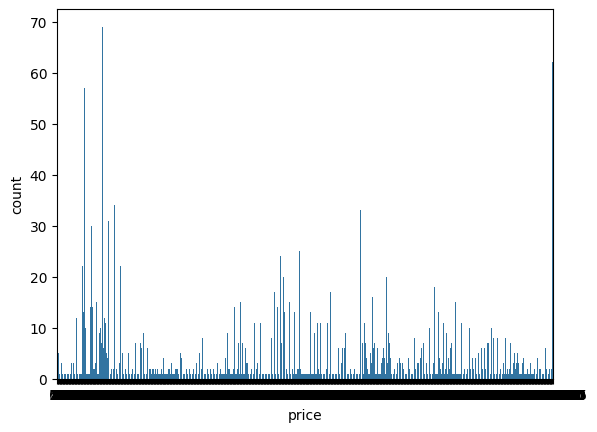

In [ ]:
sns.countplot(x="price", data=df)
plt.show()

In [ ]:
100 * df["price"].value_counts() / len(df)

price
25000      2.048
73729225   1.840
20000      1.722
15000      1.692
35000      1.009
5500000    0.980
16000      0.920
30000      0.920
17000      0.920
18000      0.890
7500000    0.890
10000      0.861
22000      0.801
12000      0.772
3500000    0.742
3000000    0.712
4500000    0.712
6500000    0.653
14000      0.653
40000      0.653
50000      0.623
6000000    0.623
3250000    0.623
7000000    0.594
3100000    0.594
4250000    0.564
5250000    0.564
2500000    0.534
11000000   0.534
2850000    0.505
13000      0.505
45000      0.505
4200000    0.505
6250000    0.475
5000000    0.475
8000000    0.475
6750000    0.475
3200000    0.475
5350000    0.475
3300000    0.445
21000      0.445
4000000    0.445
2350000    0.445
13500000   0.445
8500000    0.416
2250000    0.416
17500      0.416
4750000    0.416
19000      0.416
5950000    0.416
2950000    0.416
11500000   0.386
3400000    0.386
3150000    0.386
14500      0.386
3750000    0.386
18500      0.386
4150000    0.356
80000   

Değişkenlerin Analizi

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2890.000,10510474.280,14301282.428,550000.000,3150000.000,5400000.000,11000000.000,73729000.000
floor_number,2890.000,7.329,6.351,1.000,4.000,5.000,8.000,45.500
furniture_status,2890.000,0.955,0.208,0.000,1.000,1.000,1.000,1.000
bath_number,2890.000,1.666,0.923,1.000,1.000,1.000,2.000,6.000
dues,2890.000,400.610,846.433,1.000,200.000,200.000,200.000,8110.000
swap,2890.000,0.831,0.375,0.000,1.000,1.000,1.000,1.000
rental_income,2890.000,22871.722,15859.248,1.000,20000.000,20000.000,20000.000,162587.500
authorized_office,2890.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
gross_m2,2890.000,146.553,94.227,0.000,95.000,120.000,160.000,677.500
net_m2,2890.000,124.550,80.352,12.000,80.000,100.000,140.000,575.625


In [94]:
df.head()

,price,advert_state,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,rental_income,authorized_office,gross_m2,net_m2,room_num,hall_num,in_site,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma,facade_batı,facade_doğu,facade_güney,facade_kuzey
0,2799900,Satılık,2,3,4.000,1,1.000,250.000,0,20000.000,0,125.000,105.000,2.000,1.000,0,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
1,1624000,Satılık,4,10,20.000,1,1.000,200.000,1,20000.000,0,98.000,91.000,2.000,1.000,1,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,0
2,10000000,Satılık,1,11,8.000,1,2.000,200.000,1,20000.000,0,175.000,160.000,3.000,1.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
3,11000000,Satılık,1,16,9.000,1,2.000,335.000,1,20000.000,0,168.000,152.000,3.000,1.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,0,1,0
4,3885000,Satılık,2,0,5.000,1,3.000,200.000,0,20000.000,0,280.000,250.000,4.000,2.000,0,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1


In [95]:
#Hepsi satılık mı kontrol edelim.
get_column_info(df, ['advert_state'])

{'advert_state': {'unique_value_count': 1, 'value_counts': {'Satılık': 2890}}}

In [96]:
df.drop(columns=['advert_state'], inplace=True)

**DATA VISUALIZATION**

In [97]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2890
Variables: 72
cat_cols: 63
num_cols: 7
cat_but_car: 2
num_but_cat: 63


In [109]:
num_cols

['price',
 'floor_number',
 'dues',
 'rental_income',
 'gross_m2',
 'net_m2',
 'room_num']

In [108]:
cat_cols

['furniture_status',
 'bath_number',
 'swap',
 'authorized_office',
 'hall_num',
 'in_site',
 'credit_elegibility_Uygun',
 'credit_elegibility_Uygun değil',
 'structure_type_Betonarme',
 'structure_type_Kagir',
 'structure_type_Prefabrik',
 'structure_type_Taş Bina',
 'structure_type_Yığma',
 'structure_type_Çelik',
 'structure_status_Sıfır',
 'structure_status_Yapım Aşamasında',
 'structure_status_İkinci El',
 'using_status_Boş',
 'using_status_Kiracılı',
 'using_status_Mülk Sahibi',
 'title_deed_status_Kat Mülkiyeti',
 'title_deed_status_Kat İrtifakı',
 'fuel_type_Doğalgaz',
 'fuel_type_Elektrik',
 'fuel_type_Kömür-Odun',
 'house_type_Bungalov',
 'house_type_Daire',
 'house_type_Köşk',
 'house_type_Müstakil Ev',
 'house_type_Prefabrik',
 'house_type_Residence',
 'house_type_Villa',
 'house_type_Yalı',
 'house_type_Yalı Dairesi',
 'house_type_Yazlık',
 'house_type_Çiftlik Evi',
 'housing_shape_Ara Kat Dubleks',
 'housing_shape_Bahçe Dubleksi',
 'housing_shape_Bahçe Katı',
 'housing_sh

In [110]:
#bath_number ve hall_num numeric değişkenler
num_but_has_too_little_data = ['bath_number', 'hall_num']

In [98]:
import matplotlib.pyplot as plt

In [111]:
def cat_summary(dataframe, col_name, plot=False, palette='Set2', ax=None):
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    print(summary_df)

    if plot:
        plt.figure(figsize=(10, 6))
        unique_vals = dataframe[col_name].nunique()
        palette = sns.color_palette(palette, unique_vals)
        sns.countplot(x=col_name, data=dataframe, palette=palette,hue=col_name, dodge=False)
        plt.title(f"Column Chart of: {col_name}", fontsize=14)
        plt.legend([], [], frameon=False)
        plt.xlabel(col_name, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.show(block=True)
    print("Results")

                  furniture_status  Ratio
furniture_status                         
1                             2759 95.467
0                              131  4.533


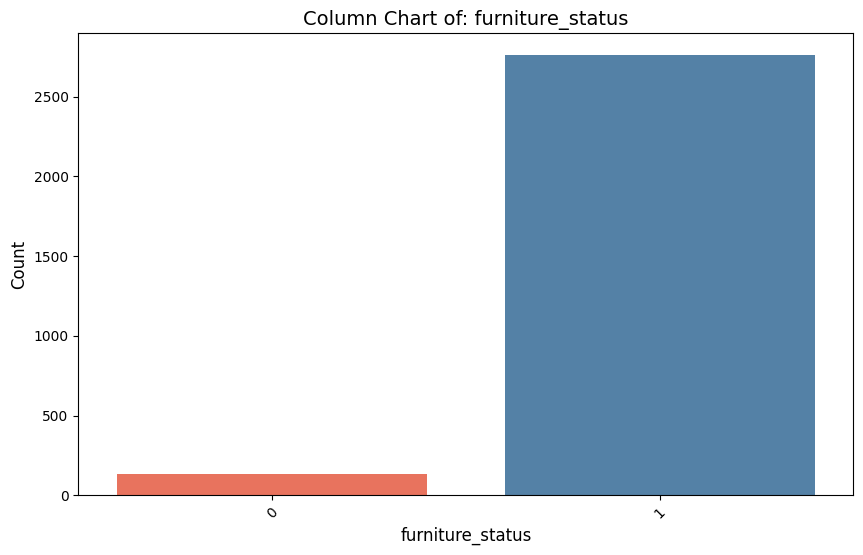

Results
      swap  Ratio
swap             
1     2402 83.114
0      488 16.886


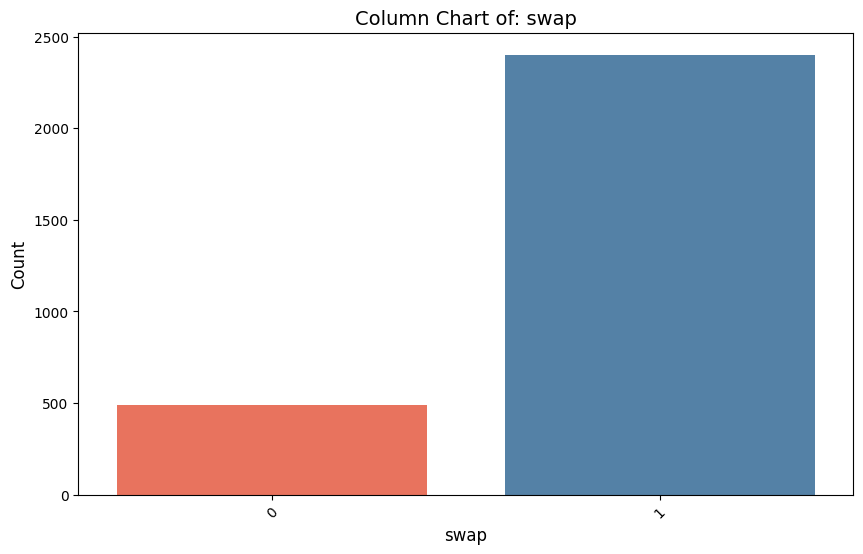

Results
                   authorized_office   Ratio
authorized_office                           
0                               2890 100.000


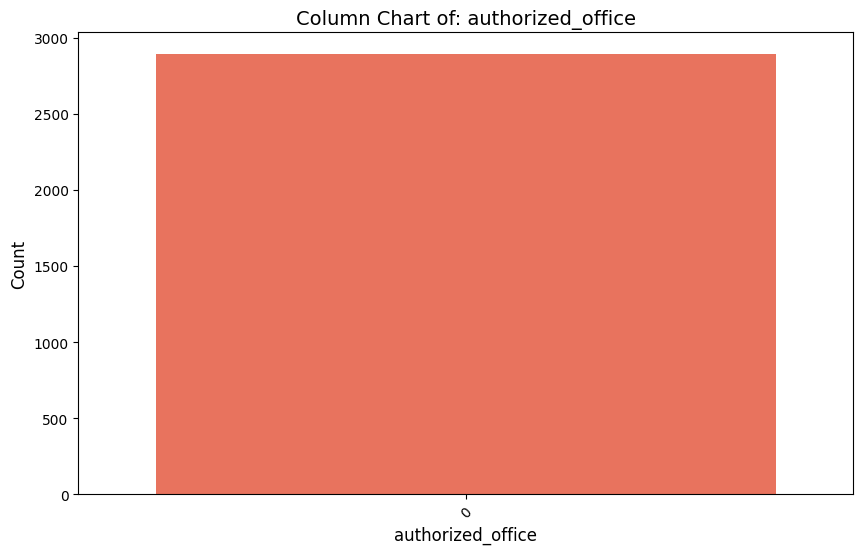

Results
         in_site  Ratio
in_site                
0           2320 80.277
1            570 19.723


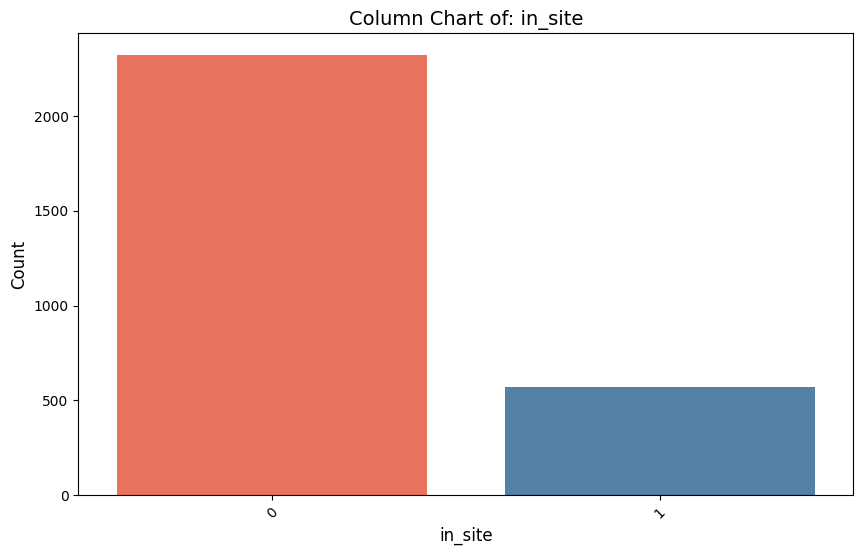

Results
                          credit_elegibility_Uygun  Ratio
credit_elegibility_Uygun                                 
True                                          2658 91.972
False                                          232  8.028


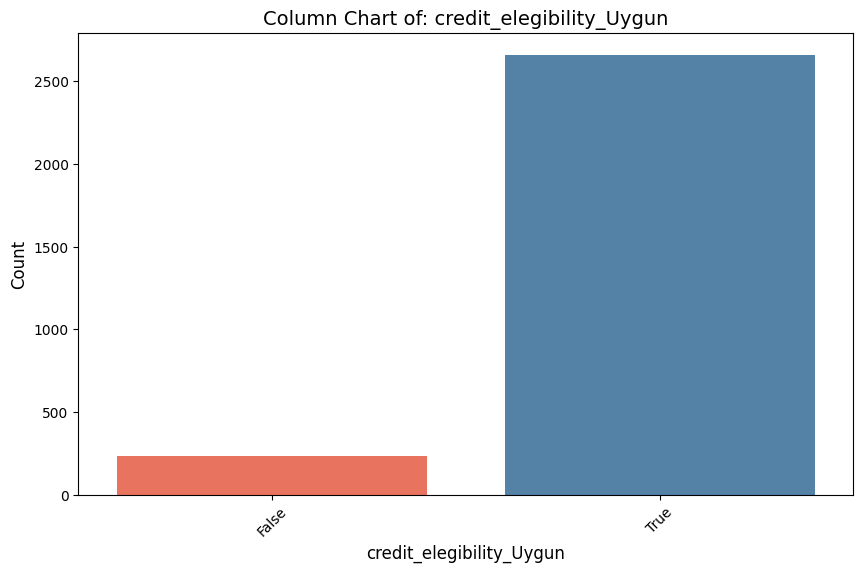

Results
                                credit_elegibility_Uygun değil  Ratio
credit_elegibility_Uygun değil                                       
False                                                     2682 92.803
True                                                       208  7.197


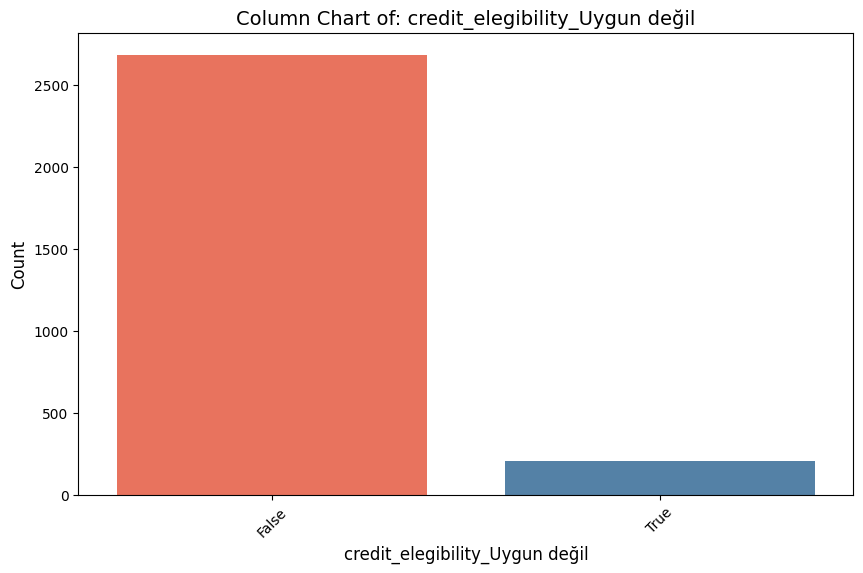

Results
                          structure_type_Betonarme  Ratio
structure_type_Betonarme                                 
True                                          2835 98.097
False                                           55  1.903


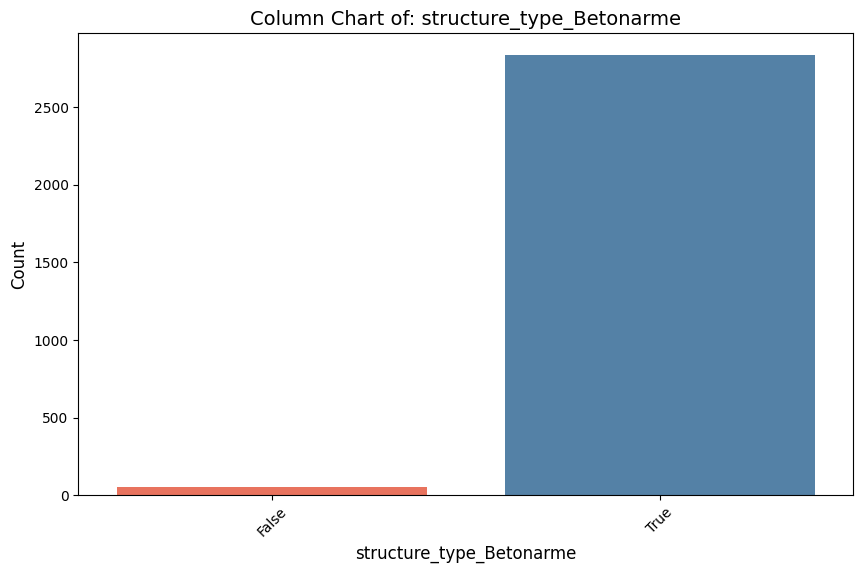

Results
                      structure_type_Kagir  Ratio
structure_type_Kagir                             
False                                 2866 99.170
True                                    24  0.830


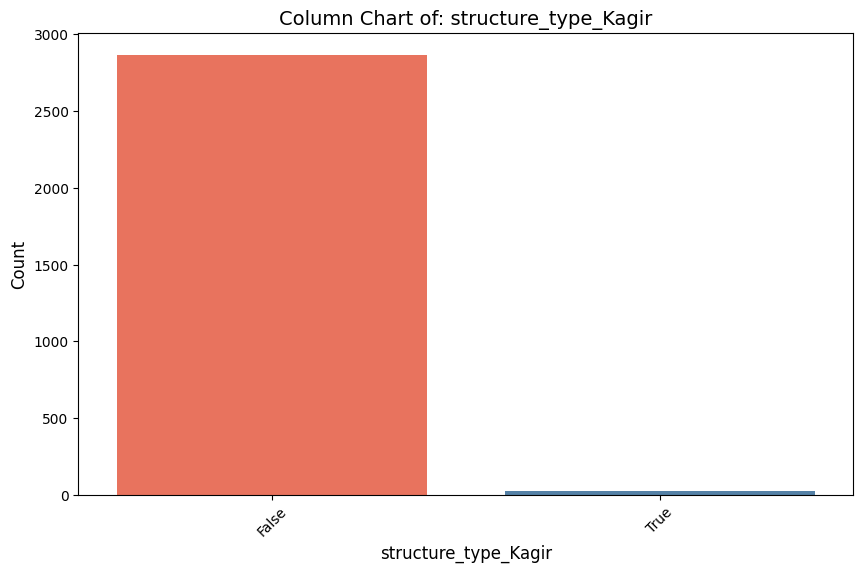

Results
                          structure_type_Prefabrik  Ratio
structure_type_Prefabrik                                 
False                                         2889 99.965
True                                             1  0.035


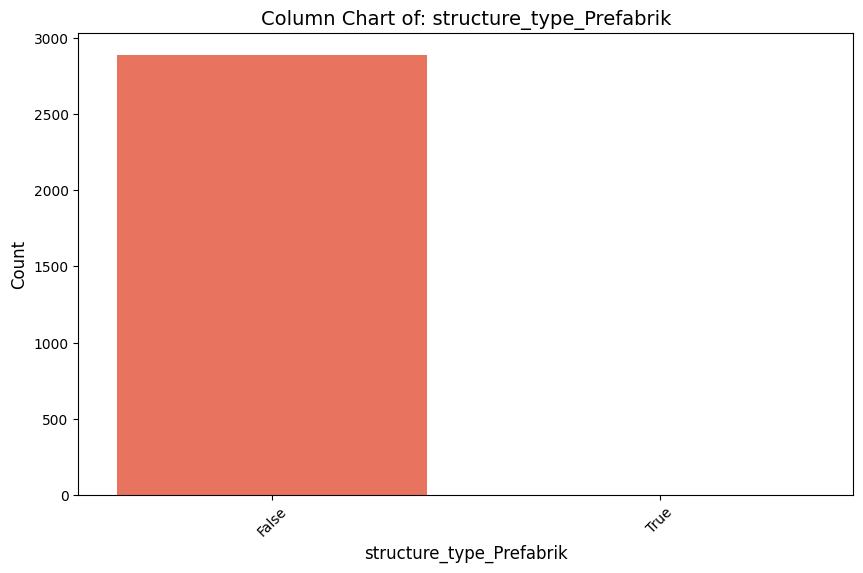

Results
                         structure_type_Taş Bina  Ratio
structure_type_Taş Bina                                
False                                       2888 99.931
True                                           2  0.069


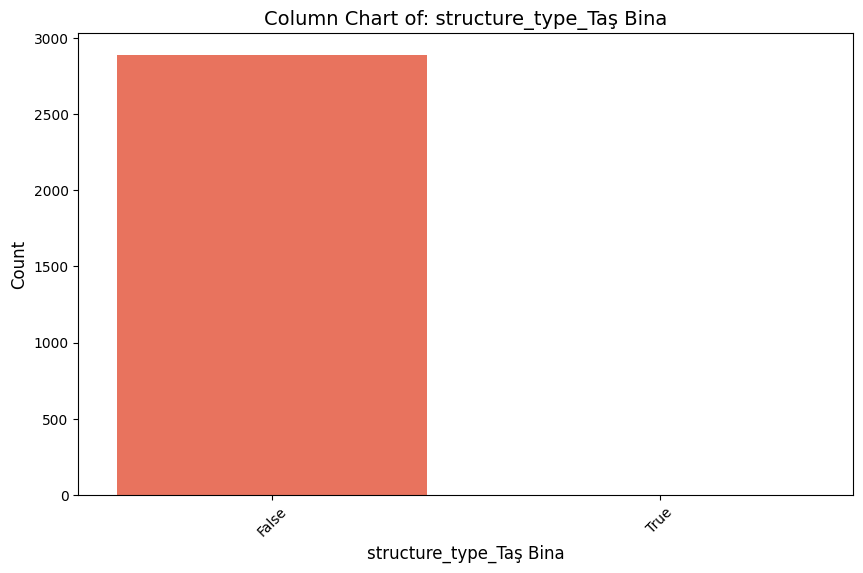

Results
                      structure_type_Yığma  Ratio
structure_type_Yığma                             
False                                 2886 99.862
True                                     4  0.138


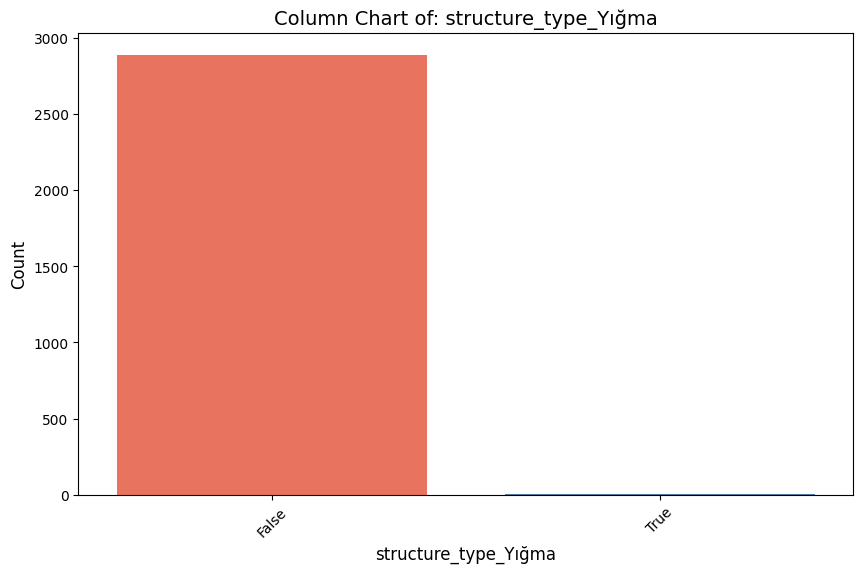

Results
                      structure_type_Çelik  Ratio
structure_type_Çelik                             
False                                 2879 99.619
True                                    11  0.381


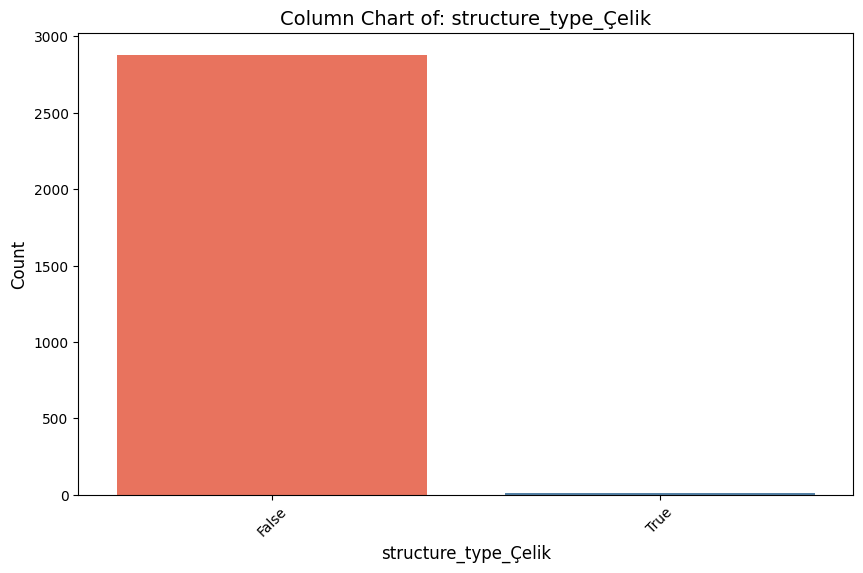

Results
                        structure_status_Sıfır  Ratio
structure_status_Sıfır                               
False                                     2230 77.163
True                                       660 22.837


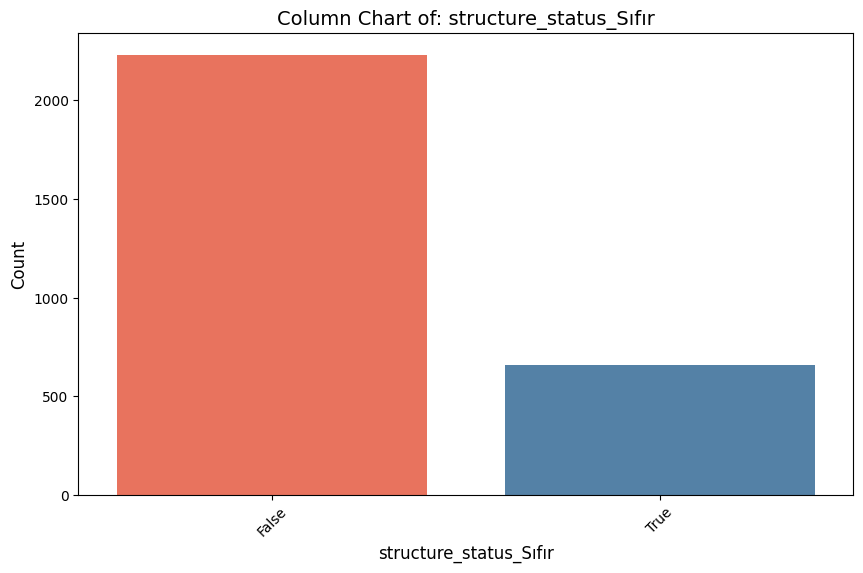

Results
                                   structure_status_Yapım Aşamasında  Ratio
structure_status_Yapım Aşamasında                                          
False                                                           2870 99.308
True                                                              20  0.692


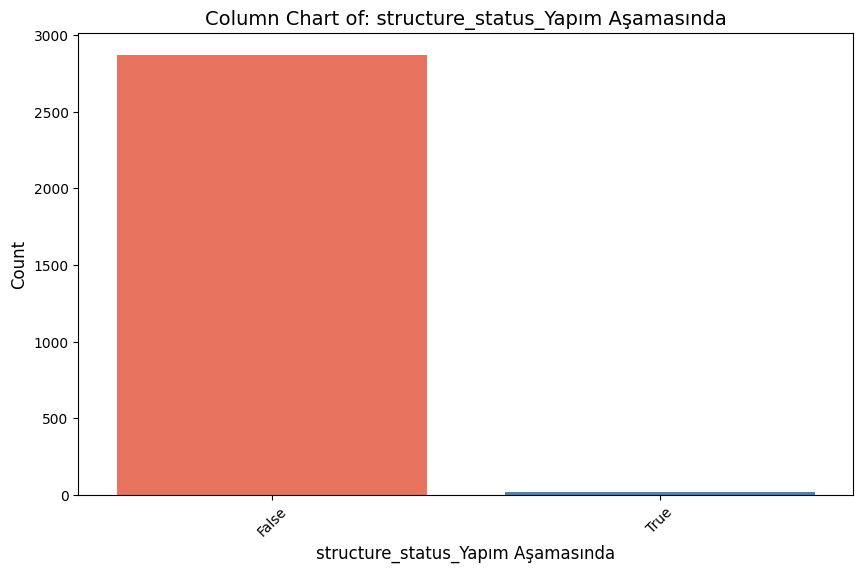

Results
                            structure_status_İkinci El  Ratio
structure_status_İkinci El                                   
True                                              2204 76.263
False                                              686 23.737


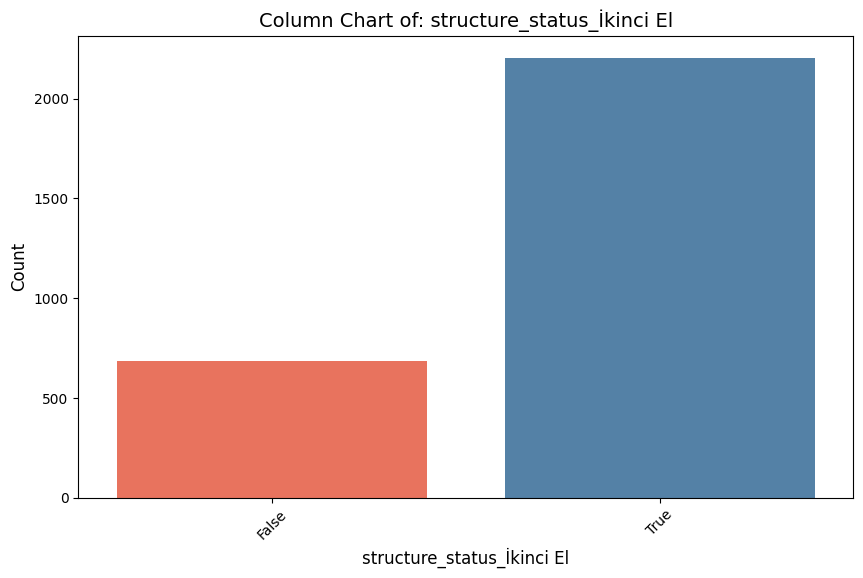

Results
                  using_status_Boş  Ratio
using_status_Boş                         
True                          1683 58.235
False                         1207 41.765


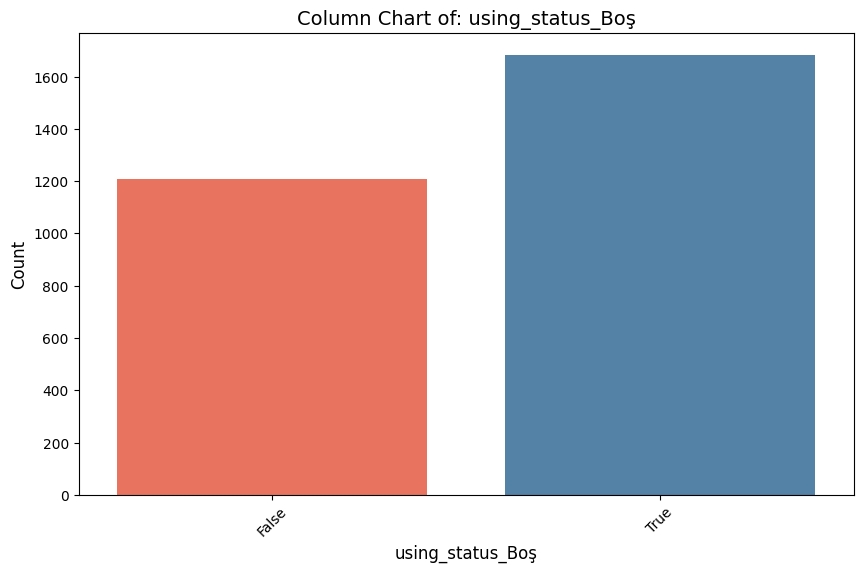

Results
                       using_status_Kiracılı  Ratio
using_status_Kiracılı                              
False                                   2259 78.166
True                                     631 21.834


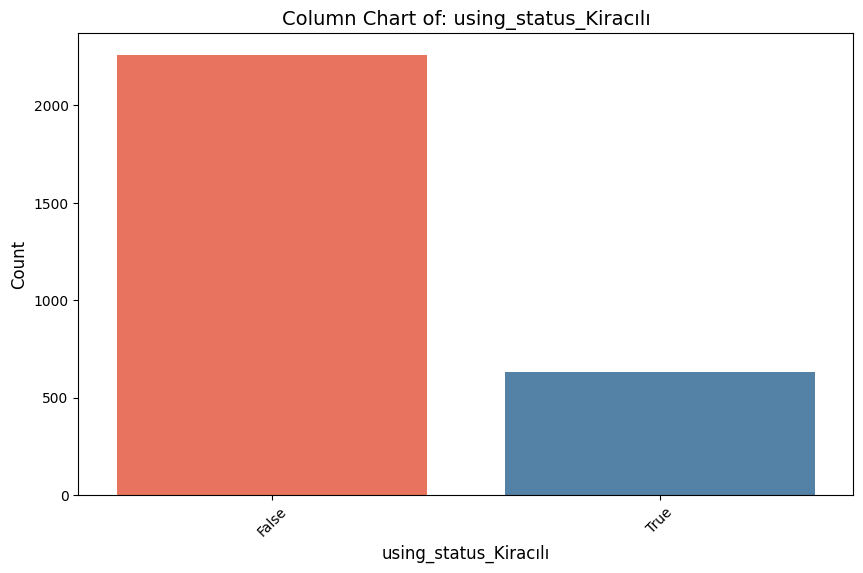

Results
                          using_status_Mülk Sahibi  Ratio
using_status_Mülk Sahibi                                 
False                                         2337 80.865
True                                           553 19.135


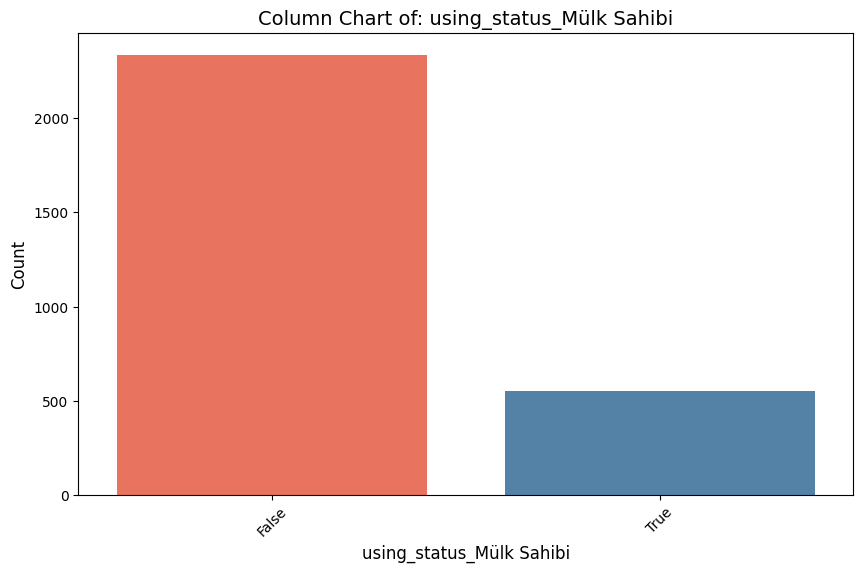

Results
                                 title_deed_status_Kat Mülkiyeti  Ratio
title_deed_status_Kat Mülkiyeti                                        
True                                                        2350 81.315
False                                                        540 18.685


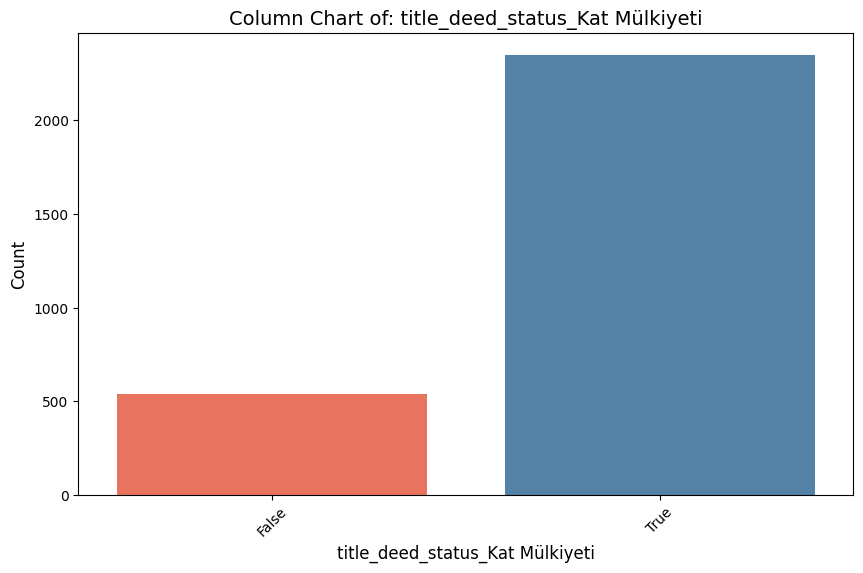

Results
                                title_deed_status_Kat İrtifakı  Ratio
title_deed_status_Kat İrtifakı                                       
False                                                     2458 85.052
True                                                       432 14.948


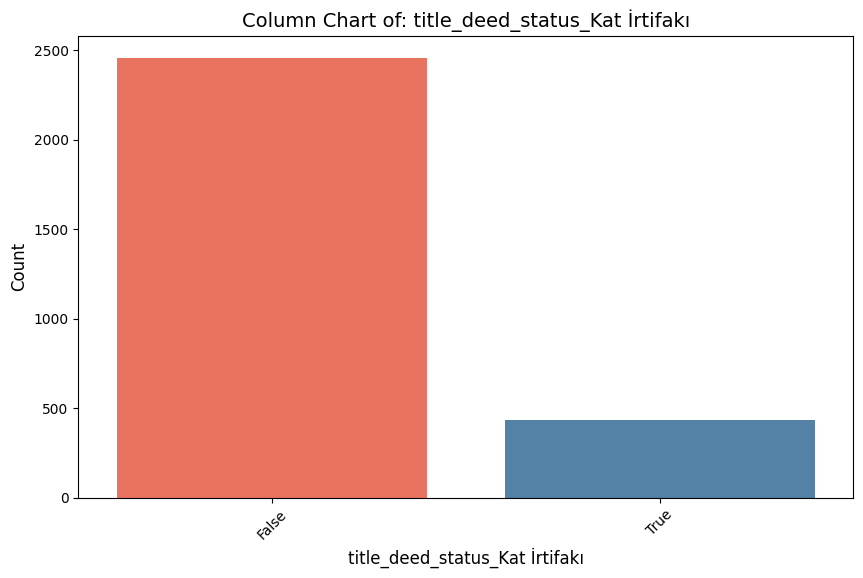

Results
                    fuel_type_Doğalgaz  Ratio
fuel_type_Doğalgaz                           
True                              2862 99.031
False                               28  0.969


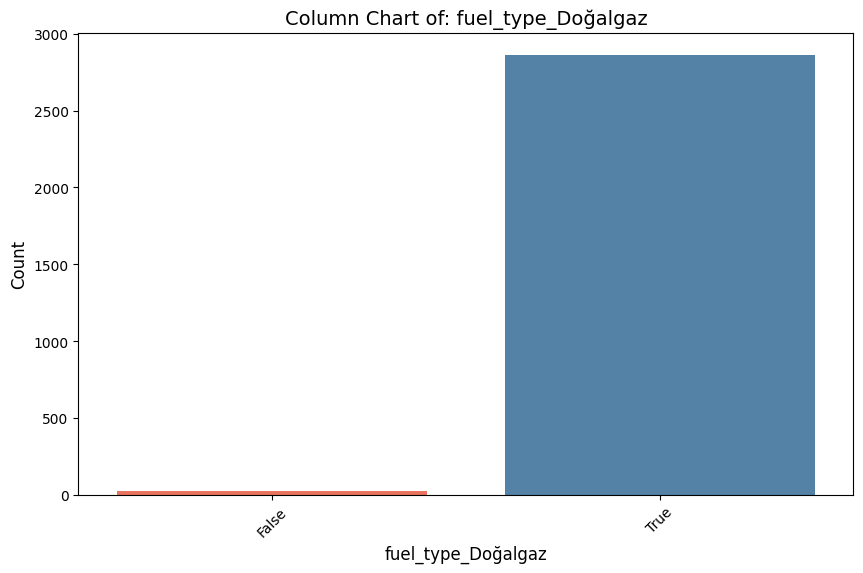

Results
                    fuel_type_Elektrik  Ratio
fuel_type_Elektrik                           
False                             2868 99.239
True                                22  0.761


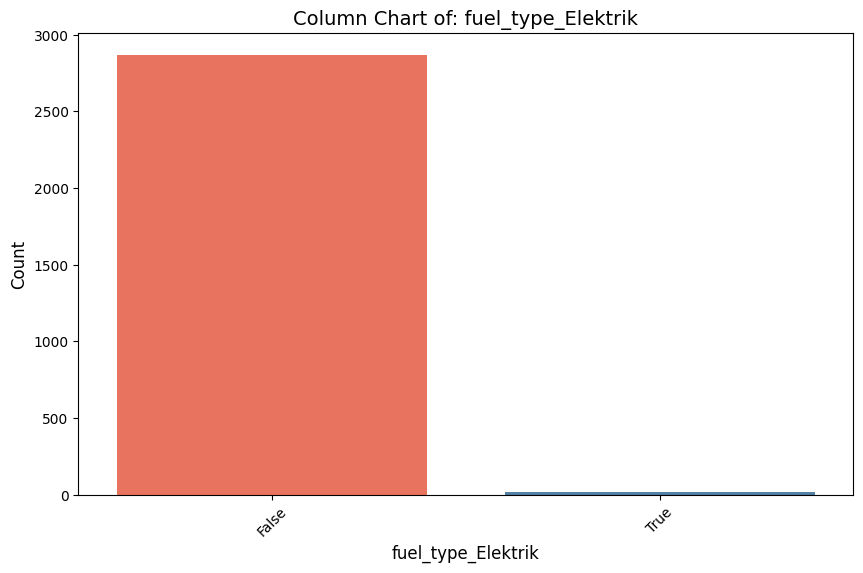

Results
                      fuel_type_Kömür-Odun  Ratio
fuel_type_Kömür-Odun                             
False                                 2886 99.862
True                                     4  0.138


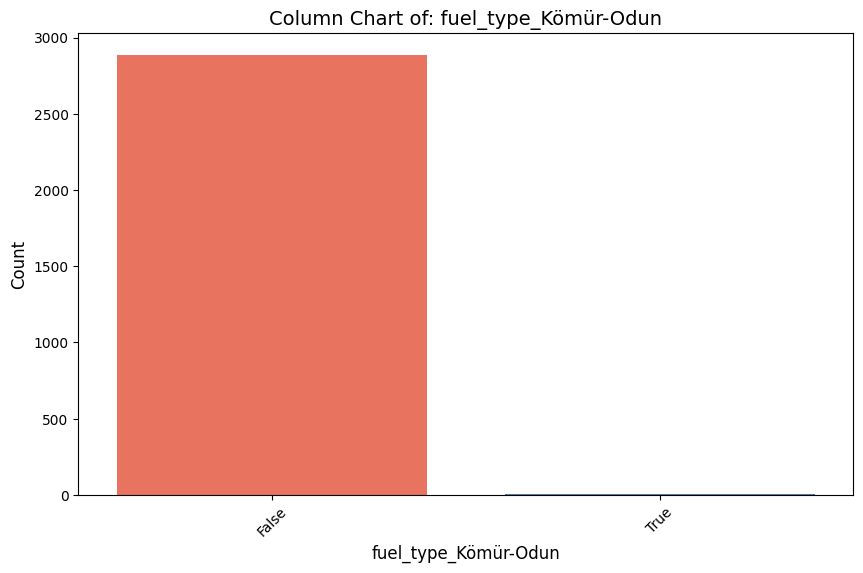

Results
                     house_type_Bungalov  Ratio
house_type_Bungalov                            
False                               2889 99.965
True                                   1  0.035


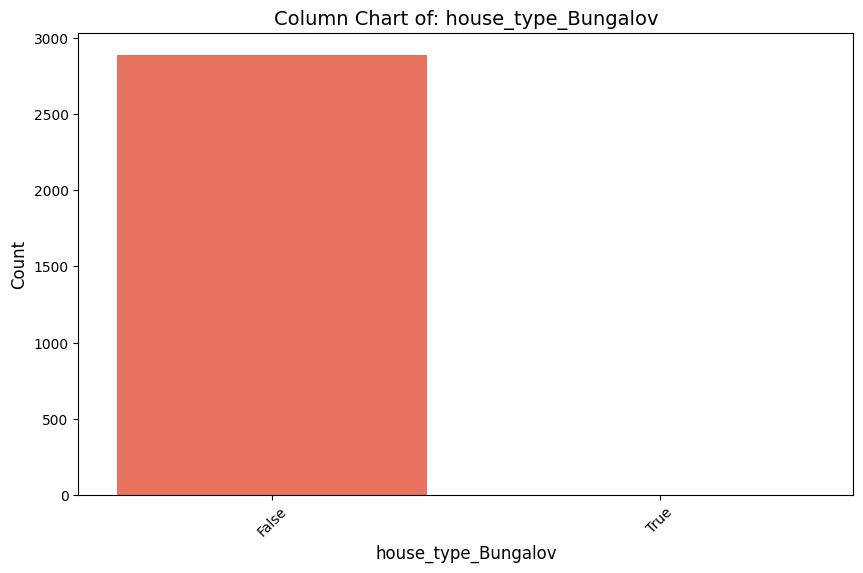

Results
                  house_type_Daire  Ratio
house_type_Daire                         
True                          2552 88.304
False                          338 11.696


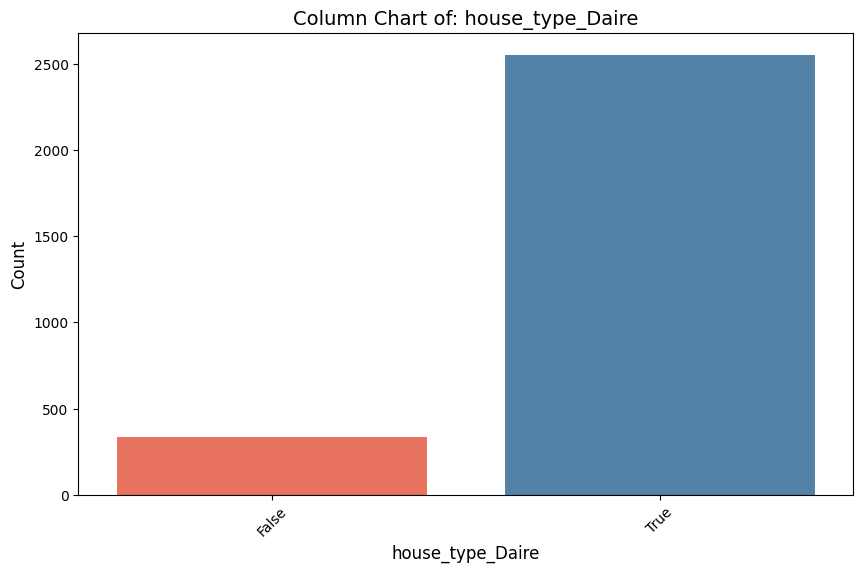

Results
                 house_type_Köşk  Ratio
house_type_Köşk                        
False                       2888 99.931
True                           2  0.069


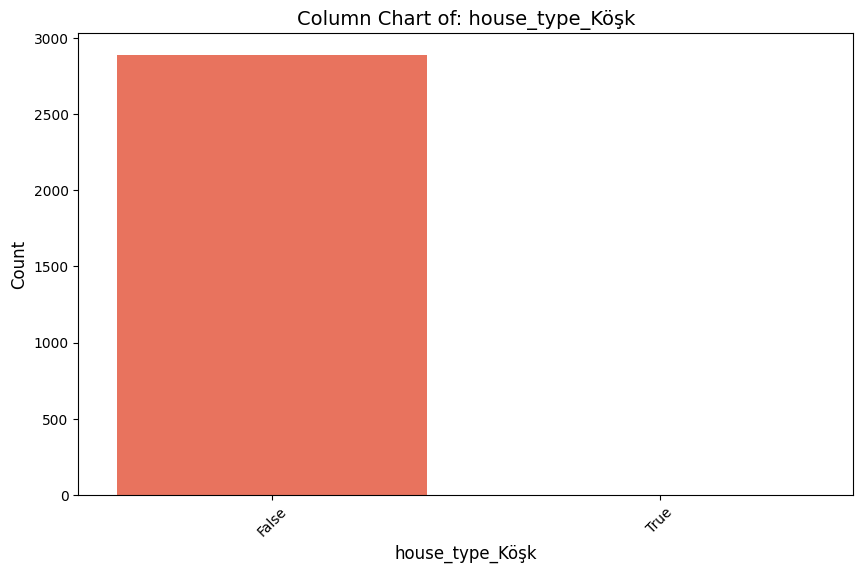

Results
                        house_type_Müstakil Ev  Ratio
house_type_Müstakil Ev                               
False                                     2848 98.547
True                                        42  1.453


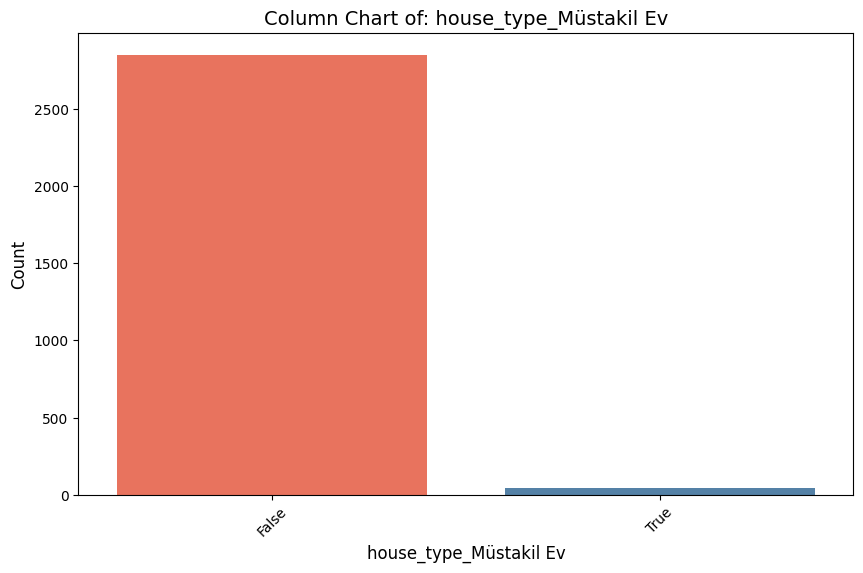

Results
                      house_type_Prefabrik  Ratio
house_type_Prefabrik                             
False                                 2889 99.965
True                                     1  0.035


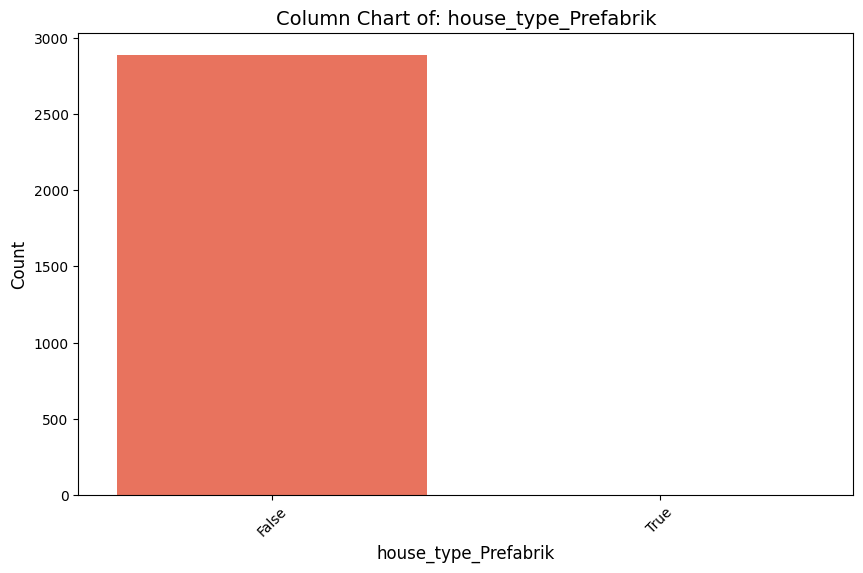

Results
                      house_type_Residence  Ratio
house_type_Residence                             
False                                 2790 96.540
True                                   100  3.460


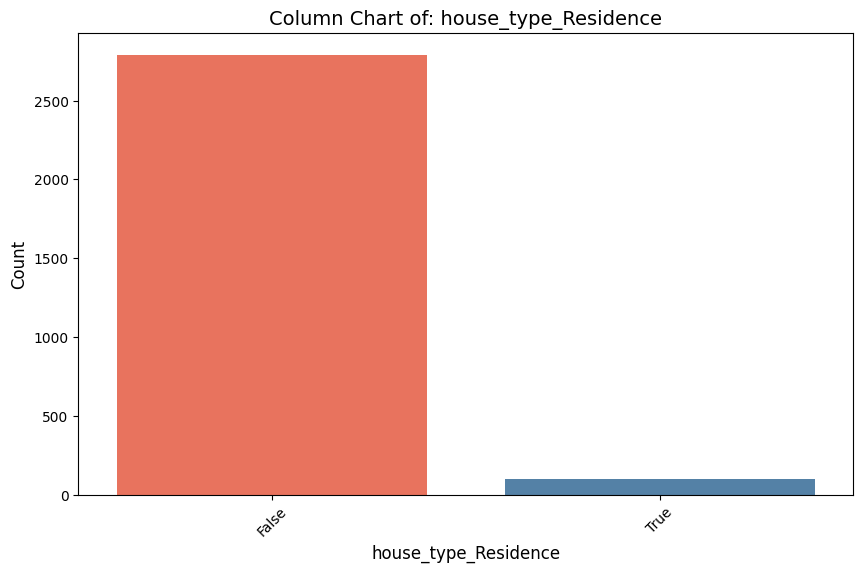

Results
                  house_type_Villa  Ratio
house_type_Villa                         
False                         2738 94.740
True                           152  5.260


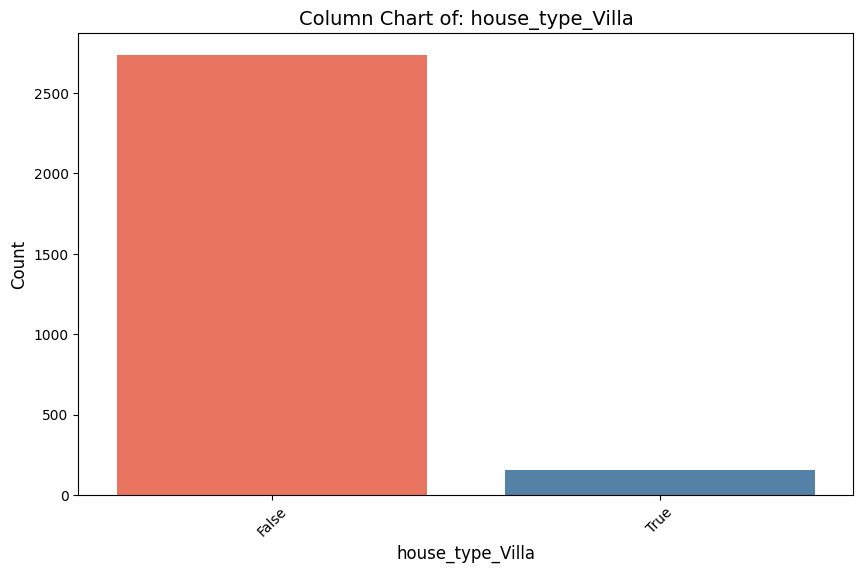

Results
                 house_type_Yalı  Ratio
house_type_Yalı                        
False                       2882 99.723
True                           8  0.277


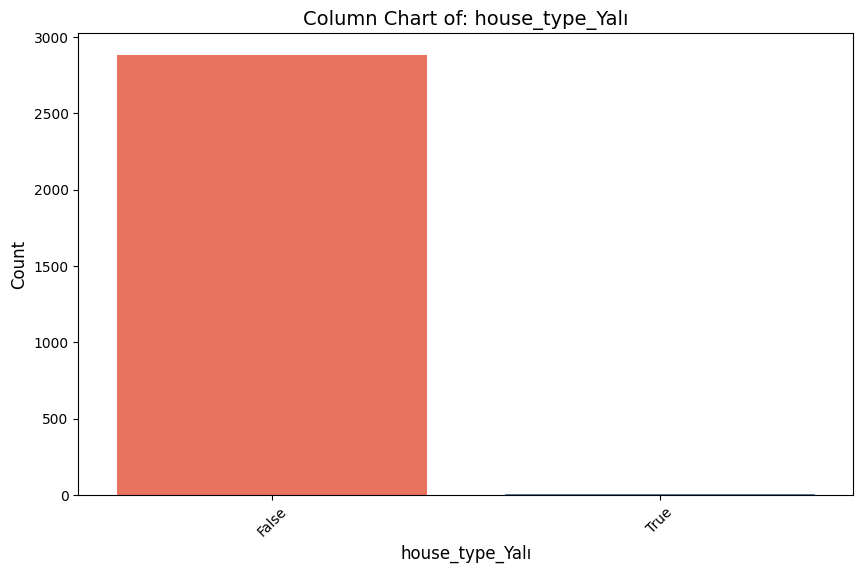

Results
                         house_type_Yalı Dairesi  Ratio
house_type_Yalı Dairesi                                
False                                       2889 99.965
True                                           1  0.035


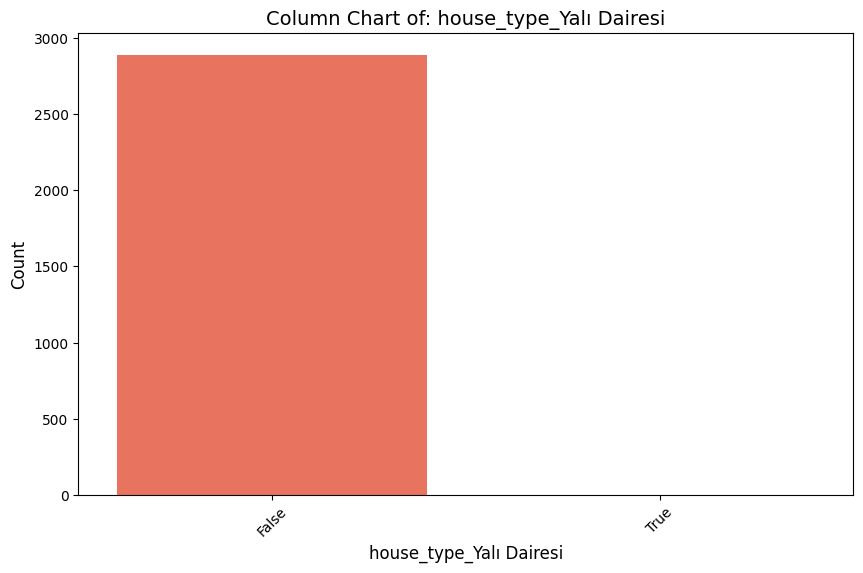

Results
                   house_type_Yazlık  Ratio
house_type_Yazlık                          
False                           2884 99.792
True                               6  0.208


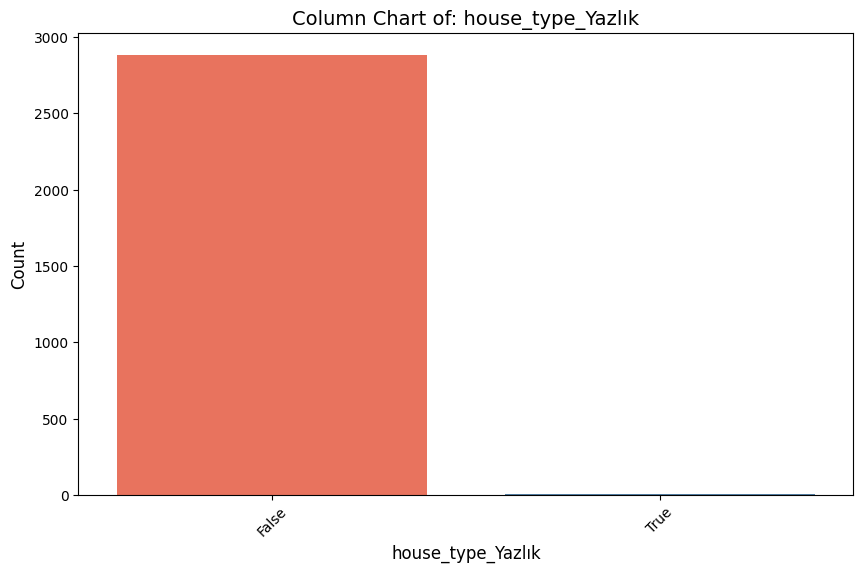

Results
                        house_type_Çiftlik Evi  Ratio
house_type_Çiftlik Evi                               
False                                     2887 99.896
True                                         3  0.104


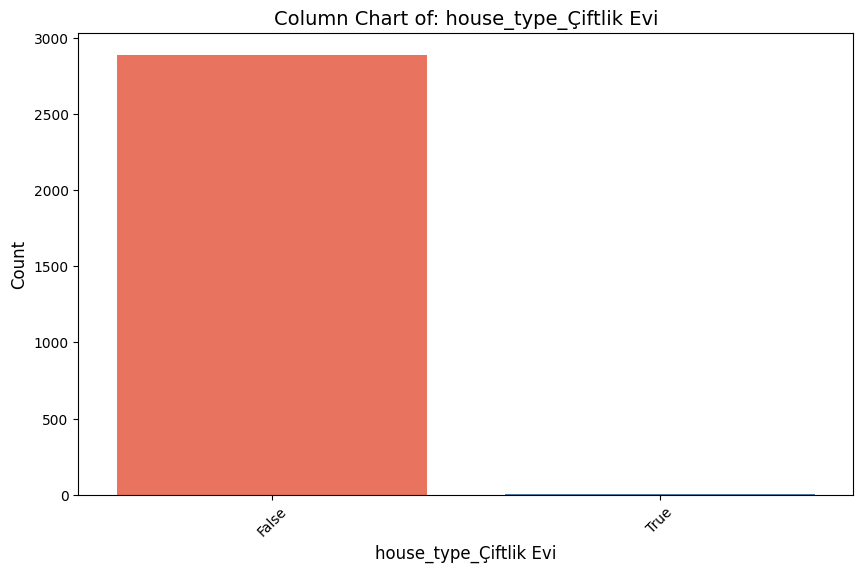

Results
                               housing_shape_Ara Kat Dubleks  Ratio
housing_shape_Ara Kat Dubleks                                      
False                                                   2869 99.273
True                                                      21  0.727


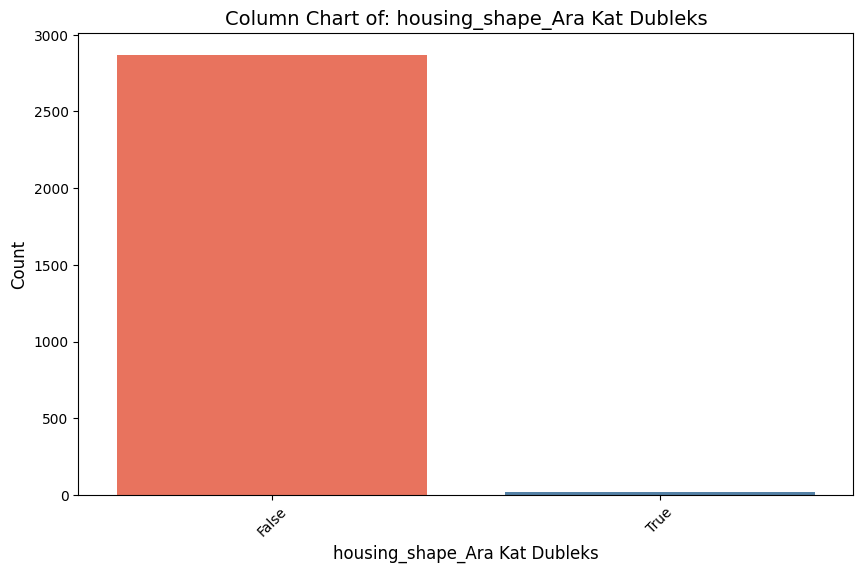

Results
                              housing_shape_Bahçe Dubleksi  Ratio
housing_shape_Bahçe Dubleksi                                     
False                                                 2860 98.962
True                                                    30  1.038


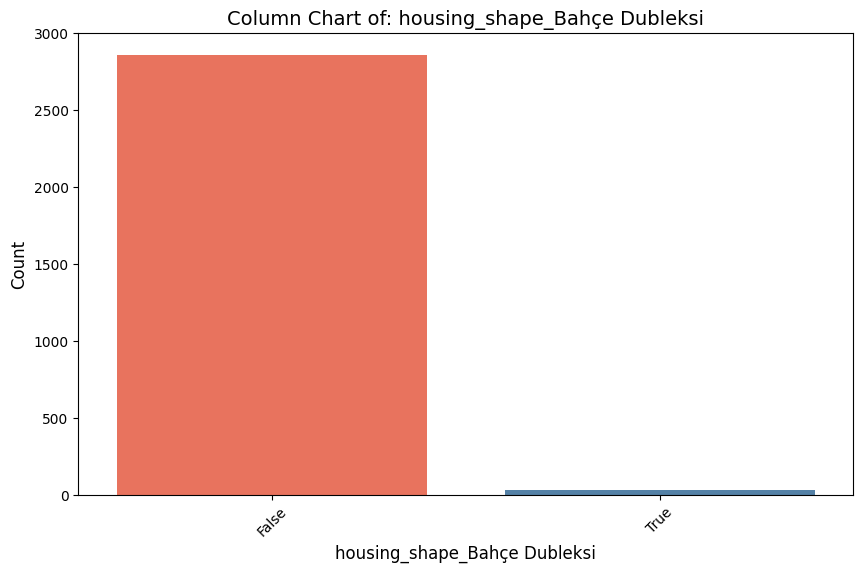

Results
                          housing_shape_Bahçe Katı  Ratio
housing_shape_Bahçe Katı                                 
False                                         2791 96.574
True                                            99  3.426


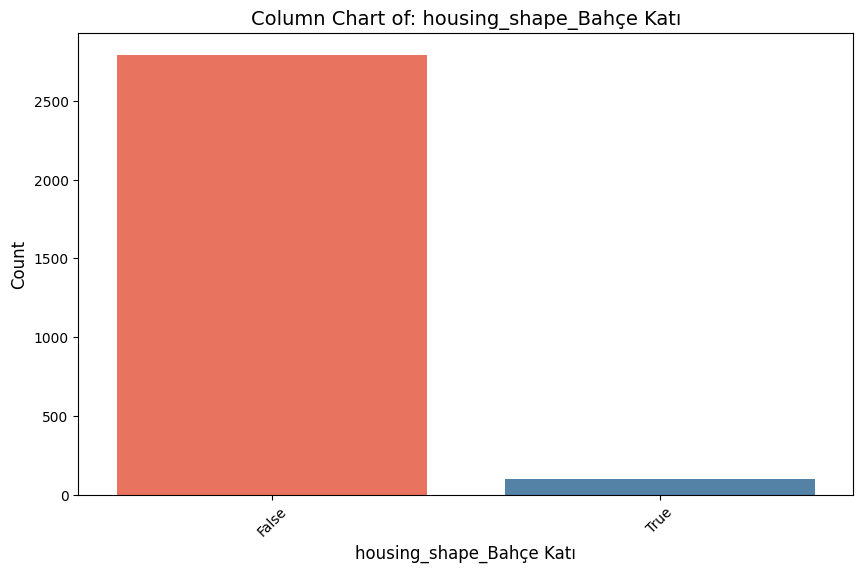

Results
                     housing_shape_Daire  Ratio
housing_shape_Daire                            
True                                2361 81.696
False                                529 18.304


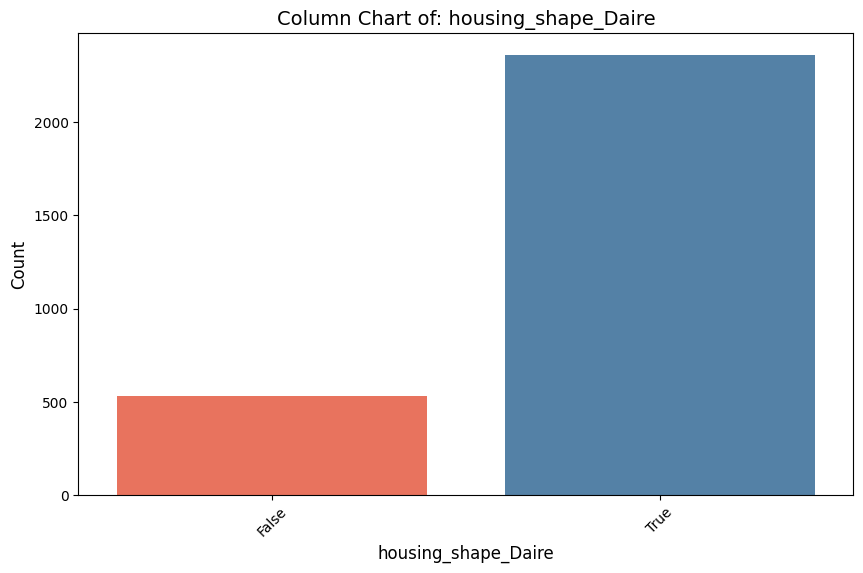

Results
                       housing_shape_Dubleks  Ratio
housing_shape_Dubleks                              
False                                   2789 96.505
True                                     101  3.495


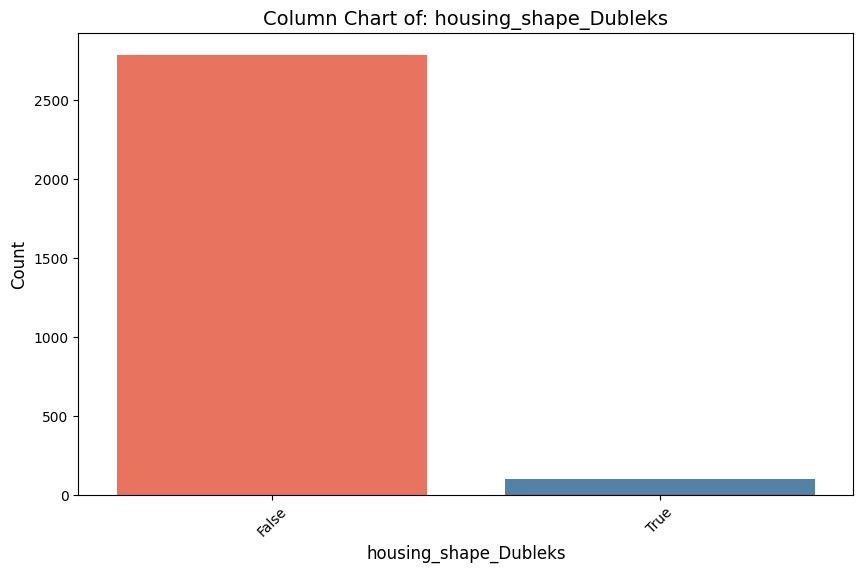

Results
                       housing_shape_Fourlex  Ratio
housing_shape_Fourlex                              
False                                   2875 99.481
True                                      15  0.519


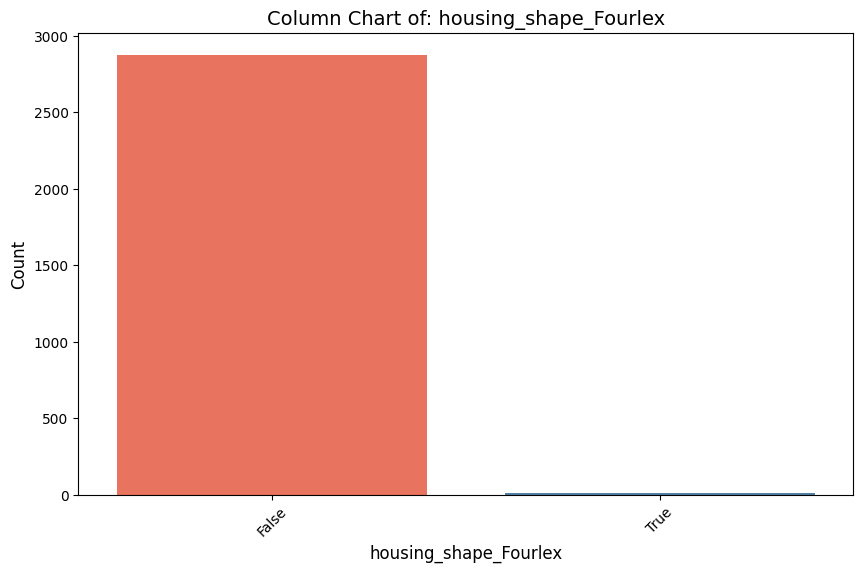

Results
                           housing_shape_Müstakil Ev  Ratio
housing_shape_Müstakil Ev                                  
False                                           2820 97.578
True                                              70  2.422


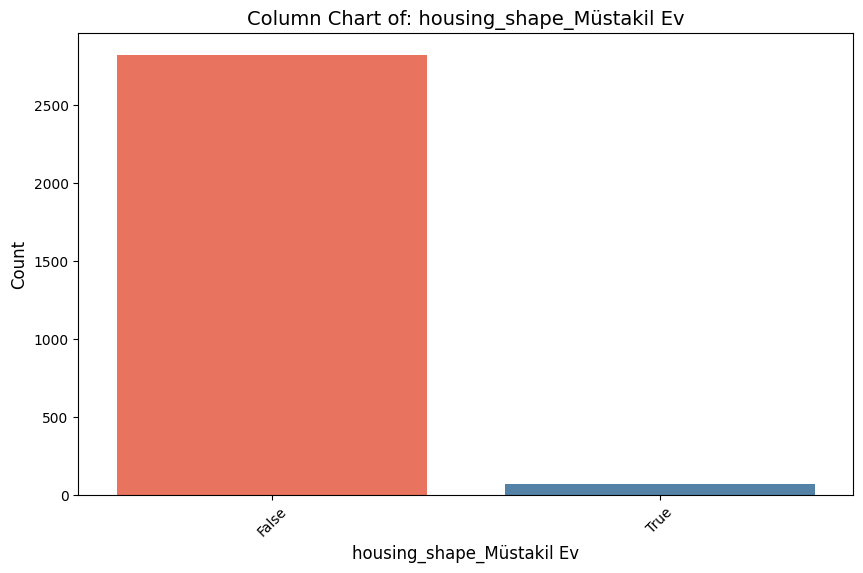

Results
                            housing_shape_Ters Dubleks  Ratio
housing_shape_Ters Dubleks                                   
False                                             2879 99.619
True                                                11  0.381


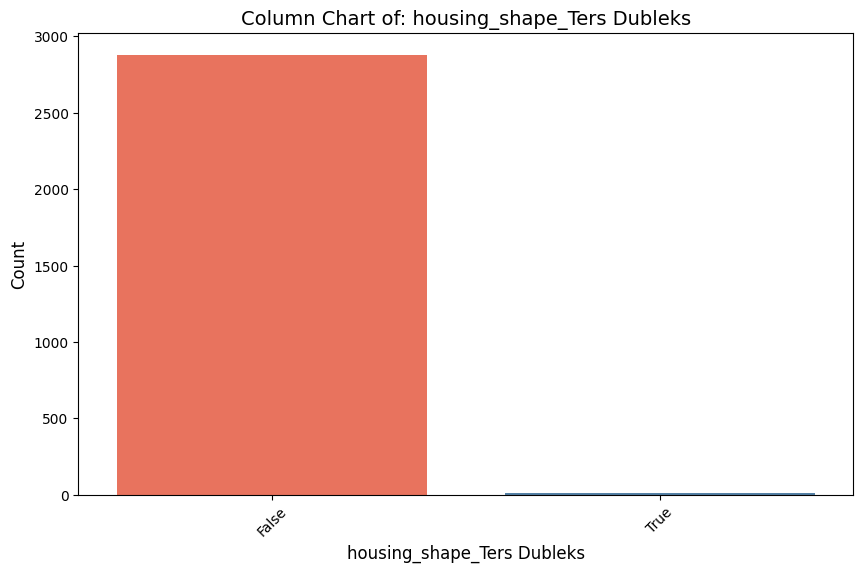

Results
                        housing_shape_Tripleks  Ratio
housing_shape_Tripleks                               
False                                     2837 98.166
True                                        53  1.834


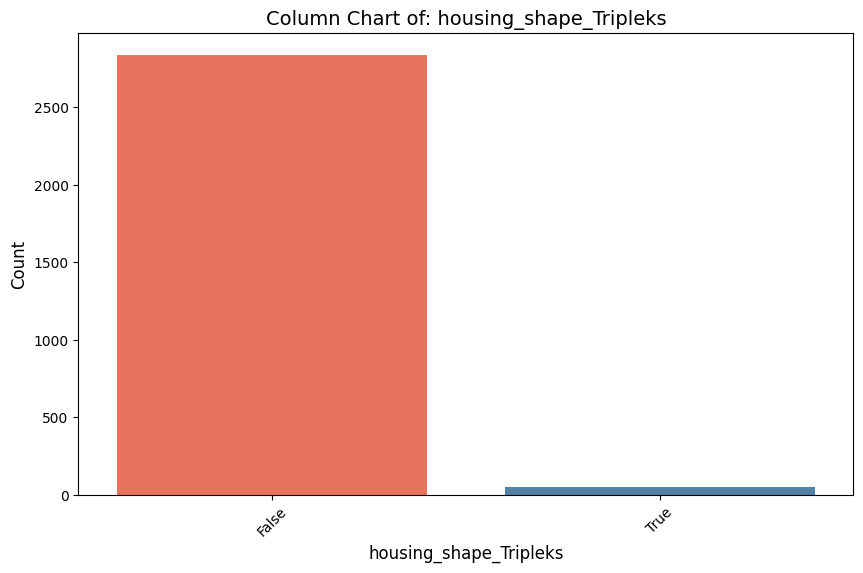

Results
                             housing_shape_Çatı Dubleksi  Ratio
housing_shape_Çatı Dubleksi                                    
False                                               2764 95.640
True                                                 126  4.360


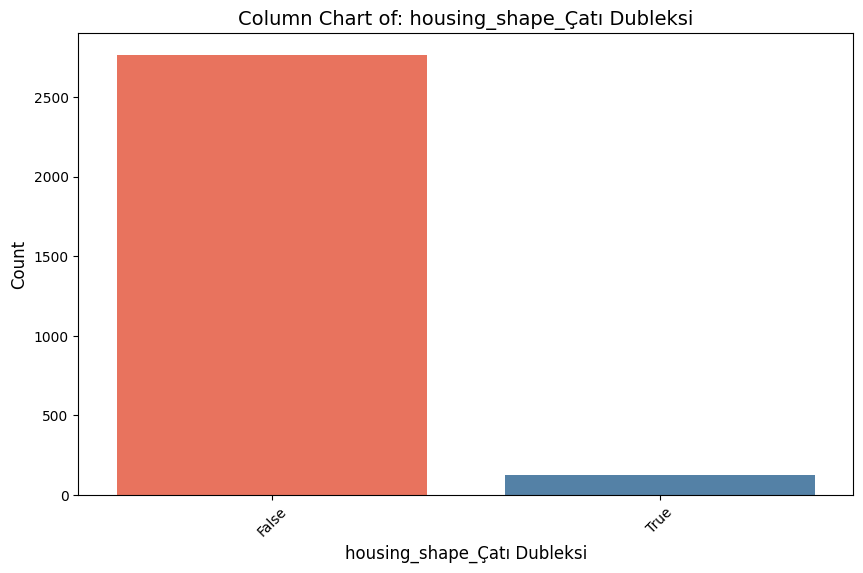

Results
                       housing_shape_İkiz Ev  Ratio
housing_shape_İkiz Ev                              
False                                   2888 99.931
True                                       2  0.069


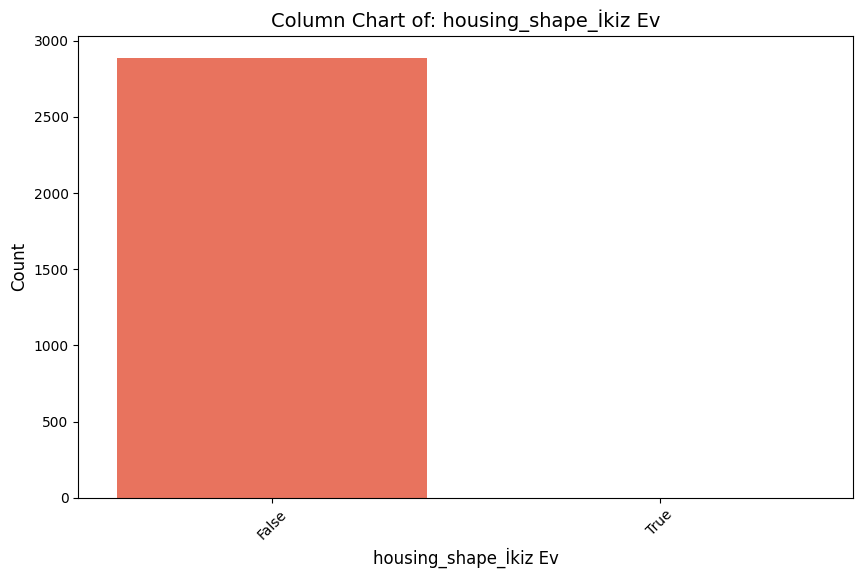

Results
                              heating_type_Doğalgaz Sobası  Ratio
heating_type_Doğalgaz Sobası                                     
False                                                 2882 99.723
True                                                     8  0.277


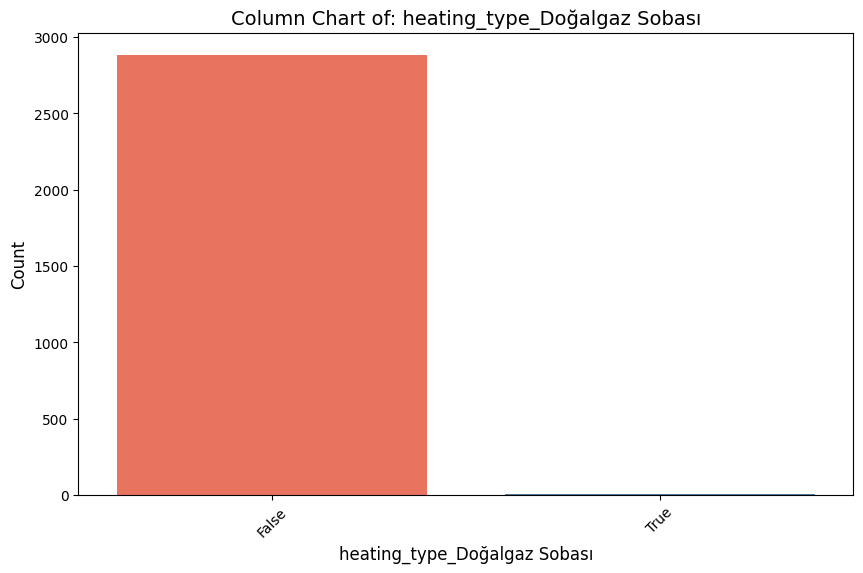

Results
                              heating_type_Fancoil Ünitesi  Ratio
heating_type_Fancoil Ünitesi                                     
False                                                 2885 99.827
True                                                     5  0.173


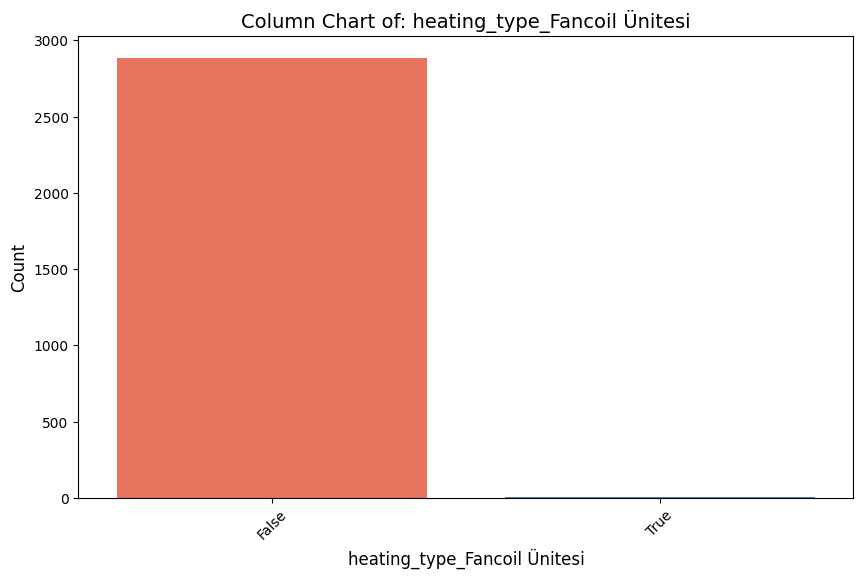

Results
                             heating_type_Güneş Enerjisi  Ratio
heating_type_Güneş Enerjisi                                    
False                                               2888 99.931
True                                                   2  0.069


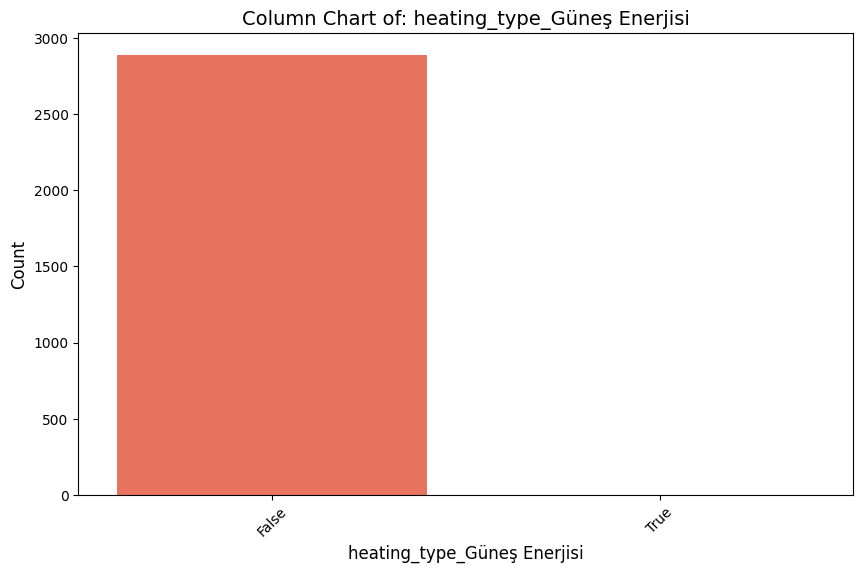

Results
                         heating_type_Isıtma Yok  Ratio
heating_type_Isıtma Yok                                
False                                       2882 99.723
True                                           8  0.277


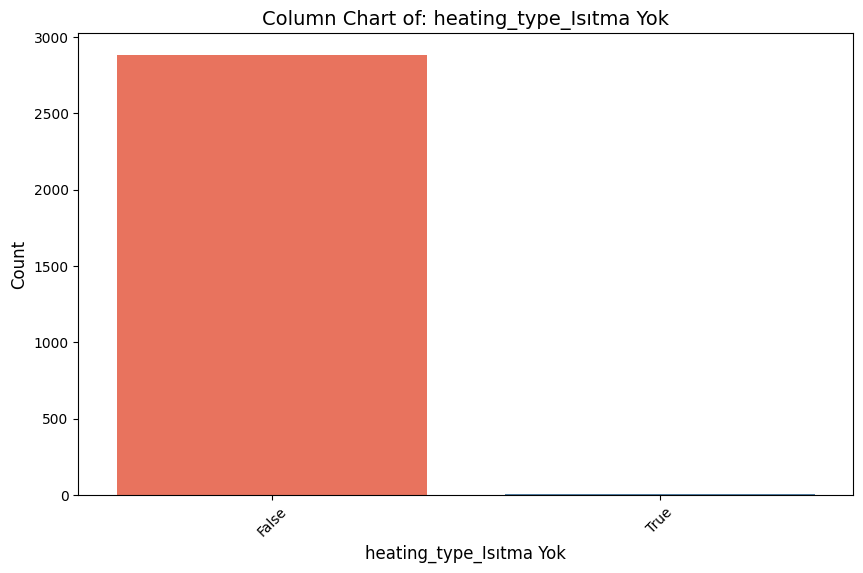

Results
                             heating_type_Kat Kaloriferi  Ratio
heating_type_Kat Kaloriferi                                    
False                                               2867 99.204
True                                                  23  0.796


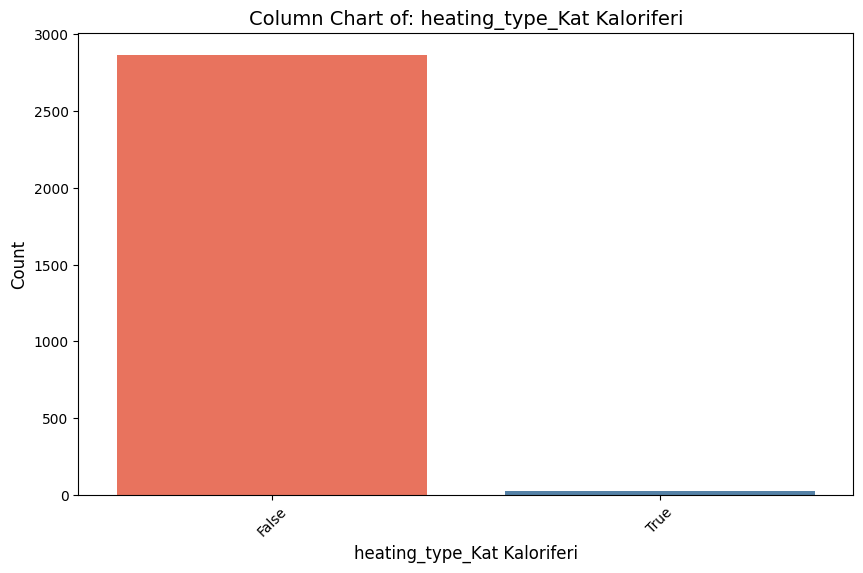

Results
                    heating_type_Klima  Ratio
heating_type_Klima                           
False                             2880 99.654
True                                10  0.346


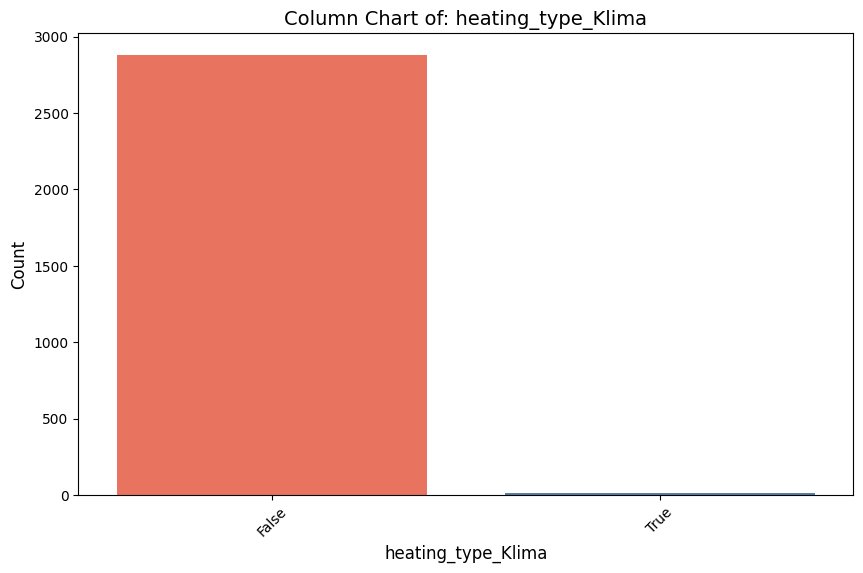

Results
                    heating_type_Kombi  Ratio
heating_type_Kombi                           
True                              2092 72.388
False                              798 27.612


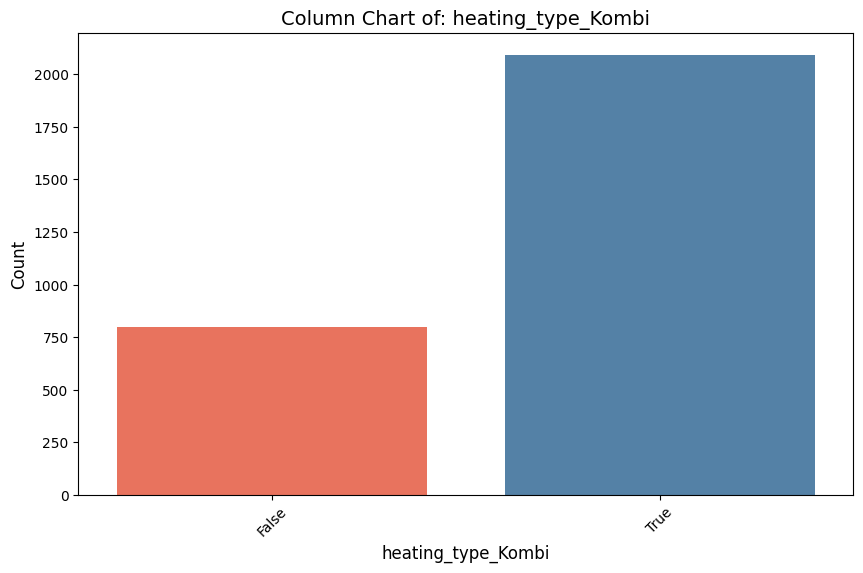

Results
                      heating_type_Merkezi  Ratio
heating_type_Merkezi                             
False                                 2683 92.837
True                                   207  7.163


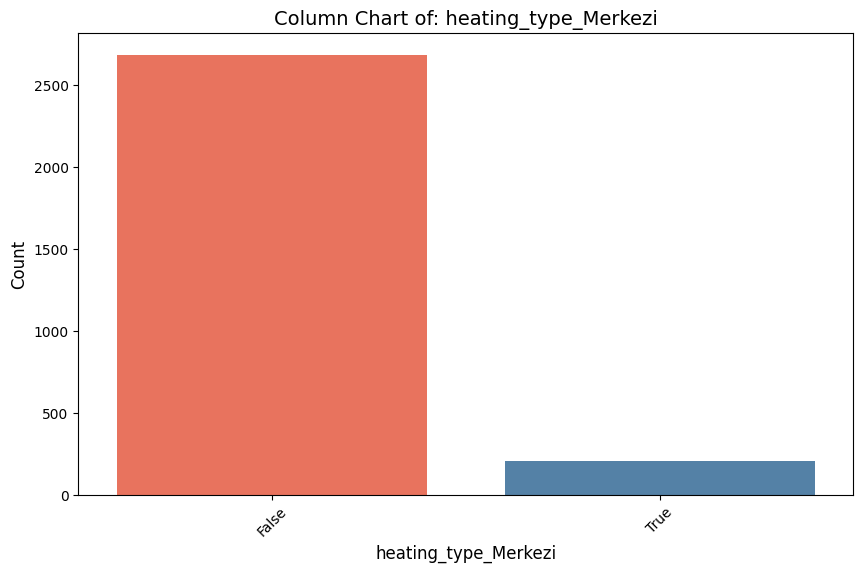

Results
                                  heating_type_Merkezi (Pay Ölçer)  Ratio
heating_type_Merkezi (Pay Ölçer)                                         
False                                                         2450 84.775
True                                                           440 15.225


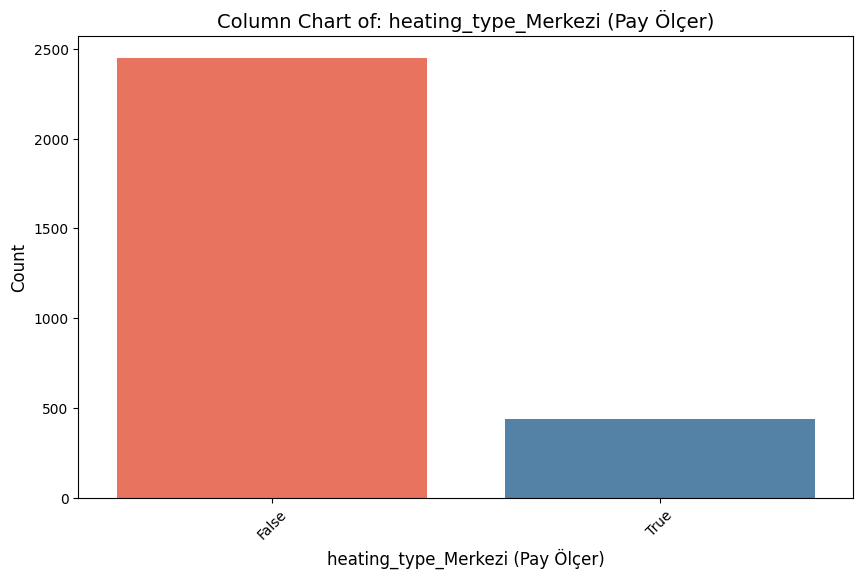

Results
                   heating_type_Soba  Ratio
heating_type_Soba                          
False                           2877 99.550
True                              13  0.450


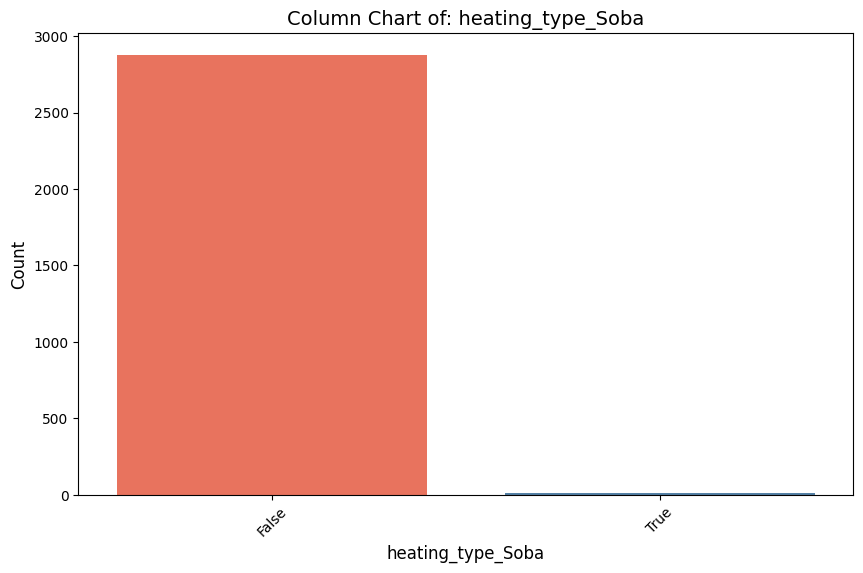

Results
                  heating_type_VRV  Ratio
heating_type_VRV                         
False                         2885 99.827
True                             5  0.173


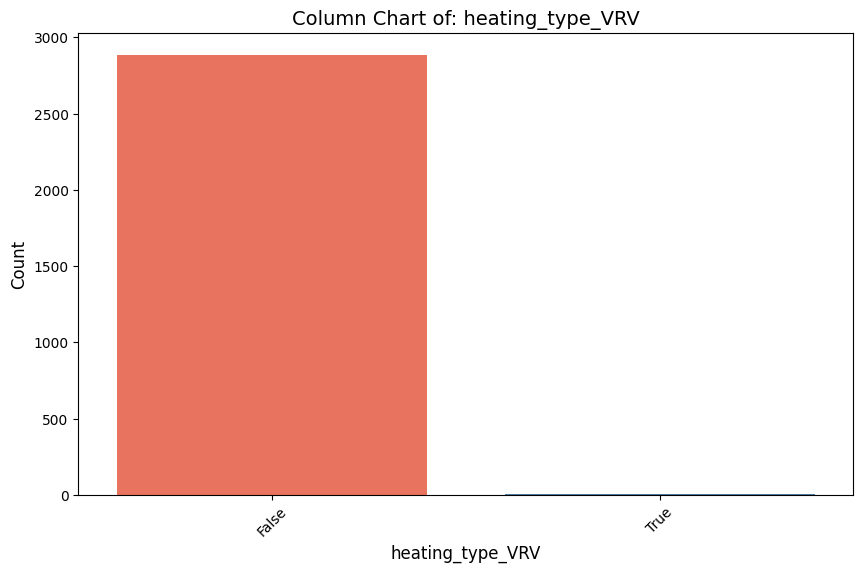

Results
                            heating_type_Yerden Isıtma  Ratio
heating_type_Yerden Isıtma                                   
False                                             2816 97.439
True                                                74  2.561


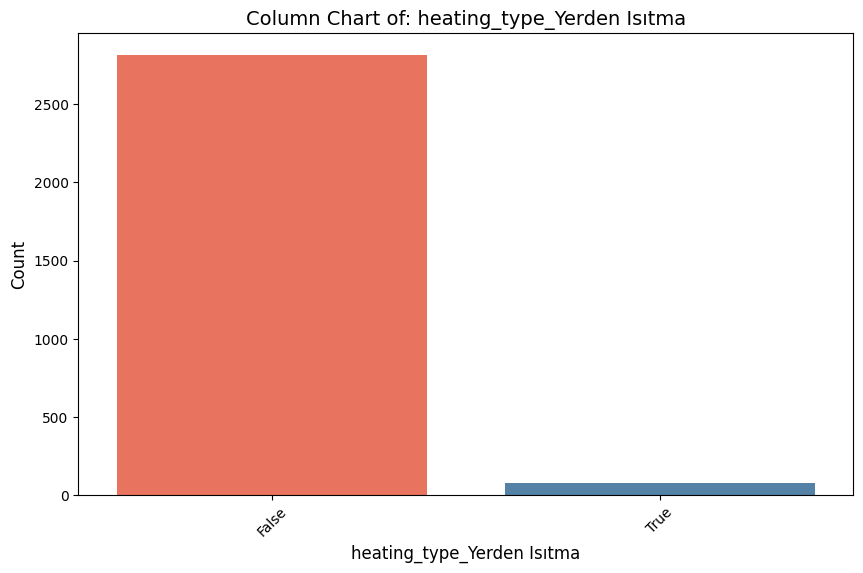

Results
             facade_batı  Ratio
facade_batı                    
0                   1810 62.630
1                   1080 37.370


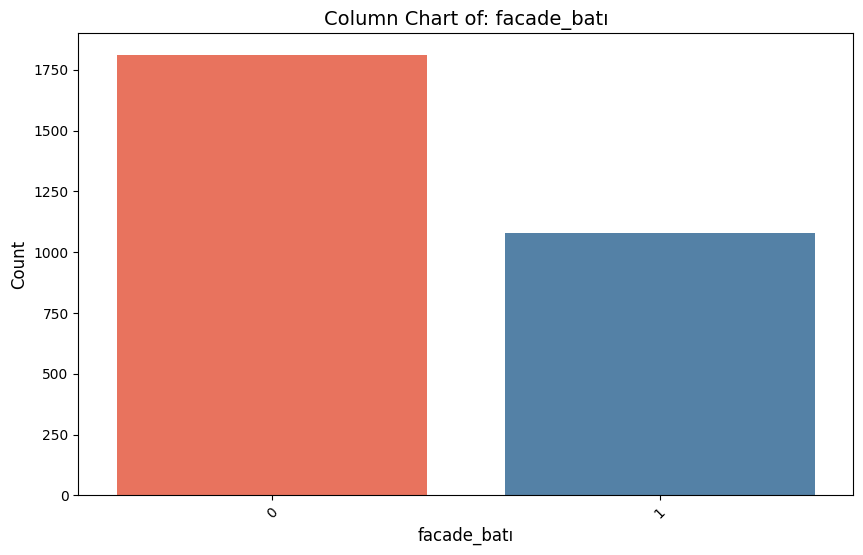

Results
             facade_doğu  Ratio
facade_doğu                    
0                   1584 54.810
1                   1306 45.190


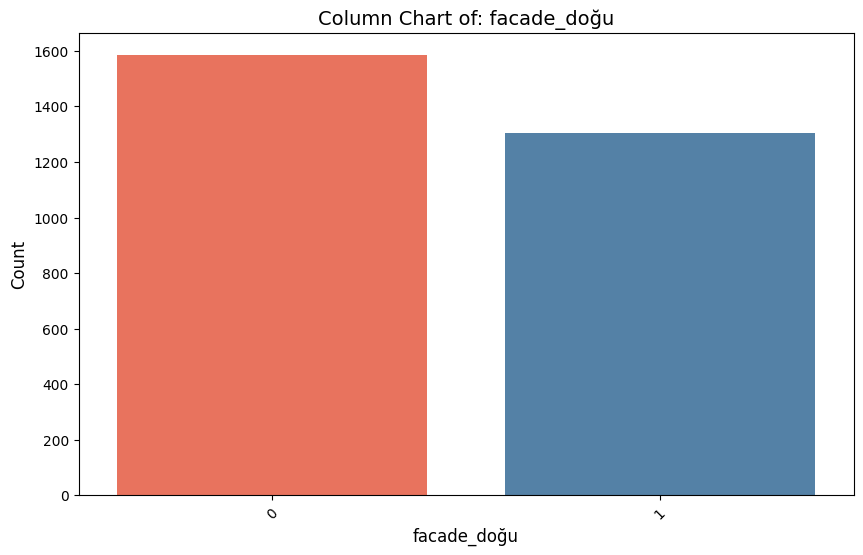

Results
              facade_güney  Ratio
facade_güney                     
1                     1892 65.467
0                      998 34.533


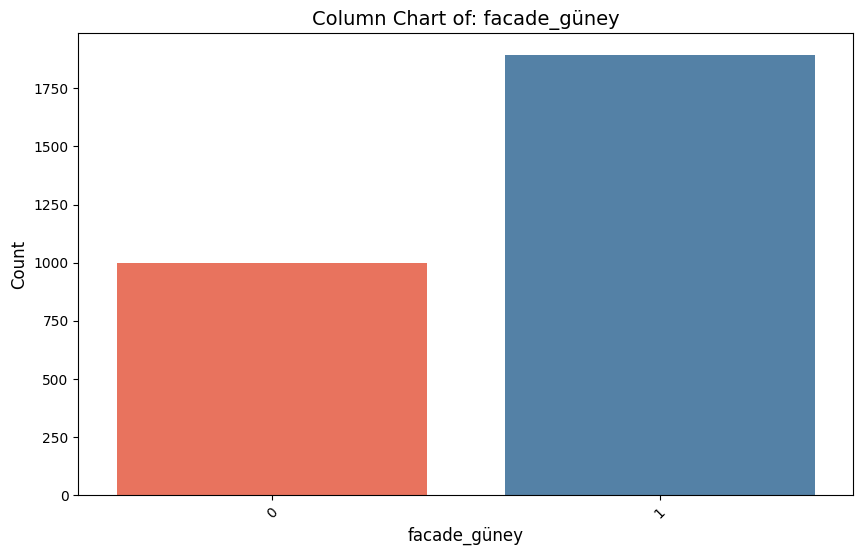

Results
              facade_kuzey  Ratio
facade_kuzey                     
0                     2226 77.024
1                      664 22.976


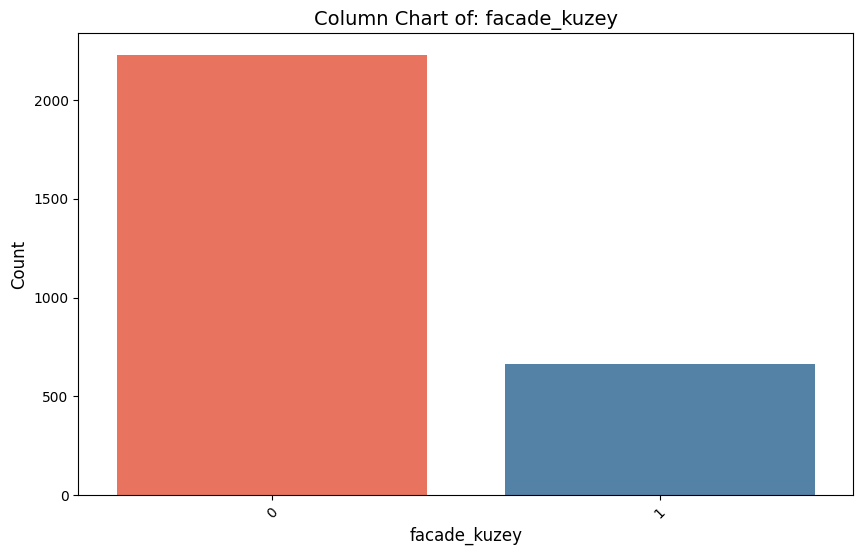

Results


In [112]:
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
for col in cat_cols:
  if col not in num_but_has_too_little_data:
    cat_summary(df, col, plot= True, palette=custom_palette)

In [116]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"Target Mean:": dataframe.
                      groupby(categorical_col)[target].mean()}))
  print("#########################")

In [117]:
for col in cat_cols:
  target_summary_with_cat(df, "price", col)

                  Target Mean:
furniture_status              
0                 10394603.046
1                 10515975.959
#########################
             Target Mean:
bath_number              
1.000         4765505.073
2.000        11352602.955
3.000        25944774.471
4.000        42455908.046
5.000        41753700.000
6.000        56893821.429
#########################
      Target Mean:
swap              
0      5509681.992
1     11526455.395
#########################
                   Target Mean:
authorized_office              
0                  10510474.280
#########################
          Target Mean:
hall_num              
0.000      4105608.696
1.000      9015852.359
2.000     21987240.279
3.000     35365526.316
4.000     57643125.000
5.000     44909666.667
6.000     25000000.000
9.000     73729000.000
115.000   16750000.000
#########################
         Target Mean:
in_site              
0        10279439.928
1        11450824.626
#########################

**NORMALIZATION**

In [123]:
for col in num_cols + num_but_has_too_little_data + cat_but_car:
    if col != 'price':  # 'price' değişkenini ölçeklendirme
        df[col] = RobustScaler().fit_transform(df[[col]])

In [122]:
cat_but_car

['which_that_floor', 'building_age']

In [124]:
df.head(30)

,price,which_that_floor,building_age,floor_number,furniture_status,bath_number,dues,swap,rental_income,authorized_office,gross_m2,net_m2,room_num,hall_num,in_site,credit_elegibility_Uygun,credit_elegibility_Uygun değil,structure_type_Betonarme,structure_type_Kagir,structure_type_Prefabrik,structure_type_Taş Bina,structure_type_Yığma,structure_type_Çelik,structure_status_Sıfır,structure_status_Yapım Aşamasında,structure_status_İkinci El,using_status_Boş,using_status_Kiracılı,using_status_Mülk Sahibi,title_deed_status_Kat Mülkiyeti,title_deed_status_Kat İrtifakı,fuel_type_Doğalgaz,fuel_type_Elektrik,fuel_type_Kömür-Odun,house_type_Bungalov,house_type_Daire,house_type_Köşk,house_type_Müstakil Ev,house_type_Prefabrik,house_type_Residence,house_type_Villa,house_type_Yalı,house_type_Yalı Dairesi,house_type_Yazlık,house_type_Çiftlik Evi,housing_shape_Ara Kat Dubleks,housing_shape_Bahçe Dubleksi,housing_shape_Bahçe Katı,housing_shape_Daire,housing_shape_Dubleks,housing_shape_Fourlex,housing_shape_Müstakil Ev,housing_shape_Ters Dubleks,housing_shape_Tripleks,housing_shape_Çatı Dubleksi,housing_shape_İkiz Ev,heating_type_Doğalgaz Sobası,heating_type_Fancoil Ünitesi,heating_type_Güneş Enerjisi,heating_type_Isıtma Yok,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi,heating_type_Merkezi,heating_type_Merkezi (Pay Ölçer),heating_type_Soba,heating_type_VRV,heating_type_Yerden Isıtma,facade_batı,facade_doğu,facade_güney,facade_kuzey
0,2799900,-0.600,-0.190,-0.250,1,0.000,50.000,0,0.000,0,0.077,0.083,-1.000,0.000,0,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
1,1624000,-0.200,0.143,3.750,1,0.000,0.000,1,0.000,0,-0.338,-0.150,-1.000,0.000,1,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,0
2,10000000,-0.800,0.190,0.750,1,1.000,0.000,1,0.000,0,0.846,1.000,0.000,0.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0
3,11000000,-0.800,0.429,1.000,1,1.000,135.000,1,0.000,0,0.738,0.867,0.000,0.000,1,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,0,1,0
4,3885000,-0.600,-0.333,0.000,1,2.000,0.000,0,0.000,0,2.462,2.500,1.000,1.000,0,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1
5,2460000,-0.600,-0.333,-0.250,1,1.000,0.000,0,0.000,0,0.308,0.333,-1.000,0.000,0,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,1,1,1
6,1699000,-0.600,-0.333,-0.250,1,0.000,0.000,0,0.000,0,0.000,0.133,-1.000,0.000,0,True,False,True,False,False,False,False,False,True,False,False,True,F

**MODEL**

In [131]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import Ridge


In [132]:
X = df.drop(["price"], axis=1)
y = df["price"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cross Validation Comparison of Models

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [142]:
def evaluate_models(df, target_col='price'):
    # Model listesi
    model_list = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        AdaBoostRegressor(),
        SVR(),
        KNeighborsRegressor(),
        XGBRegressor(),
        LGBMRegressor()
    ]

    # Sonuçları saklamak için listeler
    model_name_list = []
    r2_score_list = []

    # Verilerin hazırlanması
    X = df.drop(columns=[target_col])  # Hedef değişkeni çıkarıyoruz
    y = df[target_col]

    # Verileri ölçeklendirme
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)

    # Modellerin çapraz doğrulama ile değerlendirilmesi
    for model in model_list:
        model_cv = cross_val_score(model, X_scaled, y, cv=10, scoring="r2", n_jobs=-1)
        model_name_list.append(model.__class__.__name__)
        r2_score_list.append(model_cv.mean())
        print(f"{model.__class__.__name__} cross validation score: {model_cv.mean()}")
        print("-" * 50)

    # Sonuçların DataFrame olarak gösterilmesi
    results_df = pd.DataFrame({'Model': model_name_list, 'R2 Score': r2_score_list})

    # R2 skorlarının görselleştirilmesi
    plt.figure(figsize=(10, 6))
    sns.barplot(x='R2 Score', y='Model', data=results_df.sort_values(by='R2 Score', ascending=False), palette='viridis')
    plt.title('Model Performance Comparison (R2 Score)')
    plt.xlabel('R2 Score')
    plt.ylabel('Model')
    plt.show()

    return results_df

LinearRegression cross validation score: 0.4434239212005523
--------------------------------------------------
Ridge cross validation score: 0.46325255495301193
--------------------------------------------------
Lasso cross validation score: 0.4437964180089279
--------------------------------------------------
ElasticNet cross validation score: 0.5423401448434662
--------------------------------------------------
DecisionTreeRegressor cross validation score: 0.34766137401075087
--------------------------------------------------
RandomForestRegressor cross validation score: 0.6421890016911912
--------------------------------------------------
GradientBoostingRegressor cross validation score: 0.6249584099390569
--------------------------------------------------
AdaBoostRegressor cross validation score: 0.4114605264190162
--------------------------------------------------
SVR cross validation score: -0.13220225831094512
--------------------------------------------------
KNeighborsRegresso

<ipython-input-142-4e94997d68ae>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df.sort_values(by='R2 Score', ascending=False), palette='viridis')


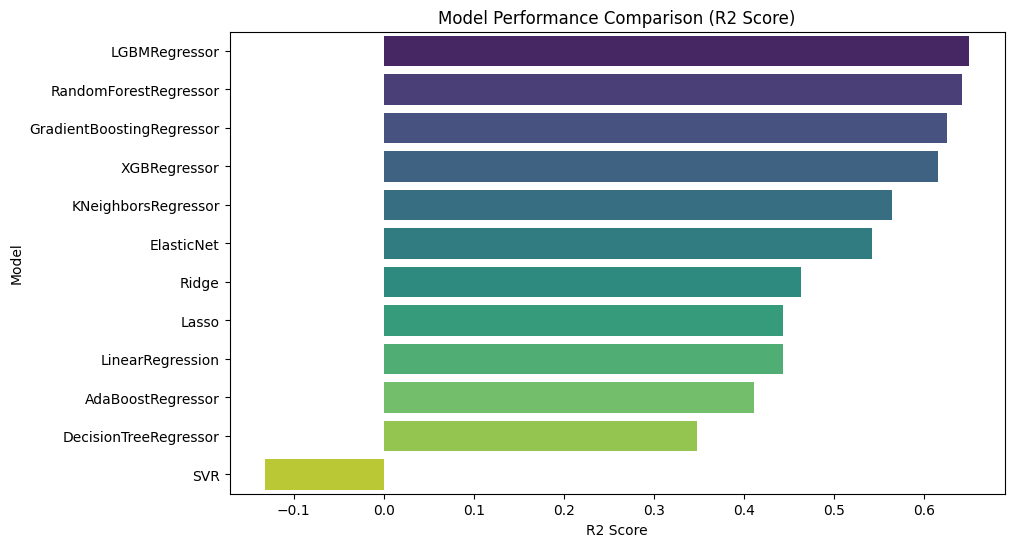

                        Model  R2 Score
0            LinearRegression     0.443
1                       Ridge     0.463
2                       Lasso     0.444
3                  ElasticNet     0.542
4       DecisionTreeRegressor     0.348
5       RandomForestRegressor     0.642
6   GradientBoostingRegressor     0.625
7           AdaBoostRegressor     0.411
8                         SVR    -0.132
9         KNeighborsRegressor     0.564
10               XGBRegressor     0.616
11              LGBMRegressor     0.650


In [143]:
results_df = evaluate_models(df)
print(results_df)

In [136]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [147]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [148]:
def optimize_lgbm(df, target_col='price'):
    # Verilerin hazırlanması
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Pipeline oluşturma
    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('model', LGBMRegressor())
    ])

    # Hyperparameter grid
    param_grid = {
        'model__learning_rate': [0.01, 0.1, 0.05],
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [3, 5, 7],
        'model__num_leaves': [31, 50, 70],
        'model__min_child_samples': [20, 30, 40],
        'model__subsample': [0.6, 0.8, 1.0],
        'model__colsample_bytree': [0.6, 0.8, 1.0]
    }

    # GridSearchCV ile model optimizasyonu
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X, y)

    # En iyi parametreler ve sonuçlar
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best R2 Score:", best_score)

    return grid_search.best_estimator_

In [ ]:
# Fonksiyonu çağırma ve en iyi modeli alma
best_lgbm_model = optimize_lgbm(df)

In [138]:
# Tahmin yapma
y_pred = random_forest_regressor.predict(X_test)

In [139]:
# Model değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [140]:
mse

83223901809901.73

In [141]:
r2

0.6939489102888482